# Исследование игровых платформ

**Описание проектной работы**

Предоставлены исторические данные о продажах игр до 2016 года. В данных содержится информация о продажах игр, об оценках пользователей и экспертов, также предоставлена информация по названиям игр и платформах. 

**Цель проекта**

Провести анализ полученных данных, выявить определяющие успешность игры закономерности и сделать ставку на потенциально популярный продукт, что бы спланировать рекламные кампании на 2017 год.

**План выполнения работы**

1. Изучение общей информации
2. Подготовка данных
  - замена названий столбцов  
  - преобразование данных в нужные типы
  - обработка пропусков
  - обработка дубликатов
  - подсчет суммарных продаж
  
  
3. Исследовательский анализ данных

  - количество игр, выпускаемых в разные годы
  - изменения количества продаж по платформам
  - определение актуального периода
  - обновление данных с учетом выбранного актуального периода
  - лидирующие платформы по количеству продаж
  - "ящик с усами" по глобальным продажам игр в разбивке по платформам
  - влияние отзывов на продажи одной платформы
  - влияние отзывов на продажи по всем платформам
  - общее распределение игр по жанрам


4. Портрет пользователя каждого региона

  - поиск самых популярных платформ
  - поиск самых популярных жанров
  - влияние рейтинга ESRB на продажи в отдельном регионе


5. Проверка гипотез

  - гипотеза 1
  - гипотеза 2
  
  
6. Выводы

    

# Содержание

[1. Изучение общей информации](#Изучение-общей-информации)

[2. Подготовка данных](#Подготовка-данных)

[3. Исследовательский анализ данных](#Исследовательский-анализ-данных)

[4. Портрет пользователя каждого региона](#Портрет-пользователя-каждого-региона)

[5. Проверка гипотез](#Проверка-гипотез)

[6. Общие выводы](#Общие-выводы)

## Изучение общей информации

[Назад к содержанию](#Содержание)

Сделаем импорт библиотек:

In [1]:
# импорт библиотек:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
# настройки:

pd.set_option('max_columns', None)

Откроем датасет и поместим данные в переменную `data`:

In [3]:
# чтение исходного датасета:

data = pd.read_csv('/datasets/games.csv')
print('Ок, датафрейм сформирован!')

Ок, датафрейм сформирован!


Выведем первые 5 строк датафрейма:

In [4]:
# вывод первых строк:

data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Выведем общую информацию методом `info()` и сделаем первые выводе о датафрейме:

In [5]:
# вывод общей информации:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В данных есть пропуски. Большинство пропусков в столбцах: `Critic_Score`, `User_Score` и `Rating`. 

Столбец `User_Score` скорее всего должен быть численным типом, например, `float64`, а сейчас у столбца тип `object`. 

Также столбец `Year_of_Release` должен быть типа `date`. Исправим в дальнейшем.

Построим общую гистограмму для всех столбцов датафрейма:

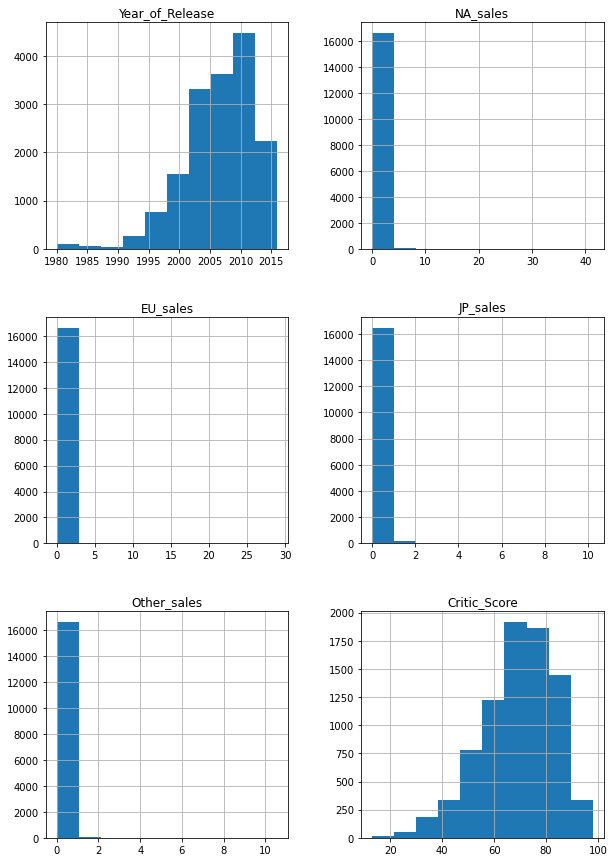

In [6]:
# общая гистограмма для датафрейма:

data.hist(figsize=(10, 15));

Перед нами представлены данные, начиная с 1980 года и до 2016 года. Посмотрим еще на исходные данные методом describe():

In [7]:
# вывод общей информации:

data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


В таблице отсутствуют данные для столбца `User_Score` - это связано с типом данных object. 

В первом шаге мы открыли и изучили исходный файл с датасетом. Сделали первоначальные выводы:

   - в исходном датасете 16715 строк;
   - есть пропуски в данных;
   - столбец `User_Score` должен быть численным типом, например, `float64`;
   - столбец `Year_of_Release` должен быть типа `date`.
    
Далее приступим к обработке исходных данных.

## Подготовка данных

[Назад к содержанию](#Содержание)

### Замена названий столбцов

In [8]:
# приведение наименований признаков к нижнему регистру:

data.columns = data.columns.str.lower()

In [9]:
# проверка:

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Преобразование данных в нужные типы

Посмотрим еще раз на наш датафрейм, вызовем метод `info()`:

In [10]:
# вывод общей информации:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


#### Столбец `user_score`:

In [11]:
# вывод уникальных значений `user_score`

data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [12]:
# подсчет пропусков `user_score`:

data['user_score'].isna().sum()

6701

Итак, видим большое количество пропущенных значений. Оставим пока `NaN` без изменений. Также видим значения `tbd`. Аббревиатуру `tbd` можно расшифровать как "to be decided", что можно перевести как "подлежит уточнению". Теперь найдем строки датафрейма, в которых встречаются значения `tbd`.

In [13]:
# подсчёт количества строк с `tbd`:

data.query('user_score == "tbd"')['user_score'].count()

2424

In [14]:
# вывод нескольких строк с `tbd`:

data.query('user_score == "tbd"').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E


Подсчитаем количество оценок пользователей со значением `tbd` по годам:

In [15]:
# количество оценок `tbd` по годам:

data.query('user_score == "tbd"') \
    .pivot_table(index='year_of_release', values='user_score', aggfunc='count')

,user_score
year_of_release,
1997.0,1
1999.0,8
2000.0,43
2001.0,82
2002.0,192
2003.0,95
2004.0,107
2005.0,121
2006.0,124


Теперь подсчитаем общее количество оценок от пользователей по годам:

In [16]:
# количество оценок по годам:

data.pivot_table(index='year_of_release', values='user_score', aggfunc='count')

,user_score
year_of_release,
1980.0,0
1981.0,0
1982.0,0
1983.0,0
1984.0,0
1985.0,1
1986.0,0
1987.0,0
1988.0,1


Для наглядности построим графики:

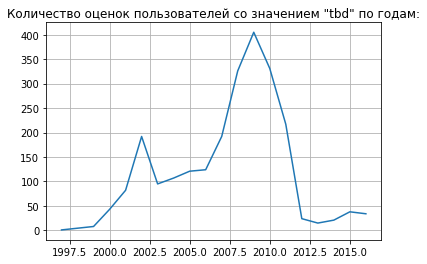

In [17]:
# график с количеством оценок `tbd` по годам:

fig, ax = plt.subplots()

ax.plot(data.query('user_score == "tbd"') \
    .pivot_table(index='year_of_release', values='user_score', aggfunc='count'))

ax.set_title('Количество оценок пользователей со значением "tbd" по годам:')
ax.grid()

plt.show()

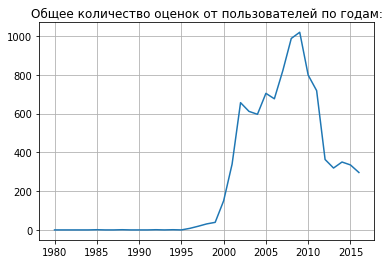

In [18]:
# график с общим количеством оценок по годам:

fig, ax = plt.subplots()

ax.plot(data.pivot_table(index='year_of_release', values='user_score', aggfunc='count'))

ax.set_title('Общее количество оценок от пользователей по годам:')
ax.grid()

plt.show()

Как видно из таблиц выше и из графиков самое большое количество оценок пользователей со значением `tbd` было зафиксировано в период с 2008г по 2011г. Общее количество оценок пользователей в этот период тоже самый максимальный. 


Поскольку аббревиатура `tbd` расшифровывается как "подлежит уточнению", считаем что это аналог пропуска оценки. Поэтому изменим значения `tbd` на `NaN` для того, чтобы в дальнейшем мы смогли выполнять математические операции над значениями в этом столбце.

In [19]:
# изменим значения 'tbd' в столбце 'user_score' на 'NaN':

data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [20]:
# приведем значения в столбце 'user_score' к числовому типу:

data['user_score'] = pd.to_numeric(data['user_score'])

In [21]:
# check:

data['user_score'].dtype

dtype('float64')

Итак, привели столбец `user_score` к типу `float64` для чего заменили значения `tbd` на `NaN`. Пропуски обработаем в дальнейшем.


Далее проверим остальные столбцы.

#### Столбец `year_of_release`:

In [22]:
# проверим тип данных:

data['year_of_release'].dtype

dtype('float64')

In [23]:
# посмотрим на формат записи:

data['year_of_release']

0        2006.0
1        1985.0
2        2008.0
3        2009.0
4        1996.0
          ...  
16710    2016.0
16711    2006.0
16712    2016.0
16713    2003.0
16714    2016.0
Name: year_of_release, Length: 16715, dtype: float64

In [24]:
# проверим наличие пропусков:

data['year_of_release'].isna().sum()

269

In [25]:
# подсчитаем % пропусков в столбце year_of_release:

print(round((data.year_of_release.isna().sum() * 100) / data.shape[0], 2), '%')

1.61 %


Пропуски в столбце `year_of_release` составляют всего `1.61%`. В данном проекте необходимо определить актуальный период, на основании которого, мы будем делать прогнозы на 2017 год. Соответственно, мы все равно будем сокращать датасет, фильтруя по году релиза. В связи с этим, удалим строки с пропусками в `year_of_release`.

In [26]:
# удаление пропусков в `year_of_release`:

data = data[~data['year_of_release'].isna()]

In [27]:
# проверим наличие пропусков:

data['year_of_release'].isna().sum()

0

In [28]:
# изменим тип данных:

data['year_of_release'] = data['year_of_release'].astype('int64')

In [29]:
# check:

data['year_of_release'].dtype

dtype('int64')

Итак, привели тип данных в столбце `year_of_release` к типу `int64`. Также удалили строчки с отсутствующими данными в столбце с годом выхода релиза.

Посмотрим еще раз на типы столбцов в датафрейме:

In [30]:
data.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

В остальных столбцах тип данных устраивает и не требует изменений.

### Обработка пропусков

Сделаем поиск пропусков.

In [31]:
# выведем общую информацию:

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16446 non-null  object 
 2   year_of_release  16446 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16446 non-null  float64
 5   eu_sales         16446 non-null  float64
 6   jp_sales         16446 non-null  float64
 7   other_sales      16446 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [32]:
# подсчитаем количество пропусков по столбцам:

data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

In [33]:
# подсчитаем процент отсутствующих данных по столбцам:

round((data.isna().sum() * 100) / data.shape[0], 2)

name                0.01
platform            0.00
year_of_release     0.00
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.46
user_score         54.62
rating             40.61
dtype: float64

#### Поиск пропусков в столбце `name`:

In [34]:
# вывод строк с пропусками в `name`:

data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Пропуски в этом столбце могли возникнуть по человеческим фактором или техническим.  

Всего 2 строки, в которых представлены игры за 1993 год, без оценок, рейтинга и небольшим количеством продаж. Вряд ли эти данные нам сильно нужны, поэтому удалим эти строки, чтобы не портить вычисления в дальнейшем:

In [35]:
# удаление строк с пропусками в `name`:
data = data.dropna(subset=['name'])

# сбросим индексы:
data = data.reset_index(drop=True)

In [36]:
# check:

data['name'].isna().sum()

0

Итак, в столбце `name` было 2 пропуска, удалили эти данные из датафрейма. Считаем, столбец `name` обработанным. Переходим к следующим признакам.

In [37]:
# вывод общей информации:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


#### Поиск пропусков в столбцах `critic_score`, `user_score` и `rating`

Пропуски в этих столбцах могли быть вызваны техническими или человеческим факторами. 

Ранее в столбце `user_score` были значения `tbd`. Возможно отсутствовали данные и их заменили на `tbd`. Такие значения мы заменили на `NaN` для возможности проведения операций над столбцом.

In [38]:
# выведем еще раз процент отсутствующих данных по столбцам:

round((data.isna().sum() * 100) / data.shape[0], 2)

name                0.00
platform            0.00
year_of_release     0.00
genre               0.00
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.45
user_score         54.62
rating             40.60
dtype: float64

Во всех трех интересующих нас столбцах большой процент пропущенных данных.

Выведем несколько строк с пропусками в столбцах `critic_score`, `user_score` и `rating`.

In [39]:
# вывод первых строк с пропусками в `critic_score`:

data[data['critic_score'].isna()].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [40]:
# вывод первых строк с пропусками в `user_score`:

data[data['user_score'].isna()].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


In [41]:
# вывод первых строк с пропусками в `rating`:

data[data['rating'].isna()].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Заполнить пропуски в данных колонках на первый взгляд можно средним, медианой или модой. Но попробуем поразмышлять. 

Данные этих колонок не являются набором случайных наблюдений. Если бы у нас была выборка оценок пользователей по отзывам на одну игру, то ее можно было считать случайными данными. Один пользователь поставил отметку 1, другой 10. Одному игра не понравилась, другому понравилась. Пропуски в такой выборке мы можем заменить средним/медианой/модой, так как все данные относятся к одной и той же игре.
В нашем случае отзыв как раз и является таким усреднением выборки оценок пользователей по одной игре и является признаком именно этой игры, не зависящей от жанра, платформы и т.д. 

Так же формируется и отзыв критиков. Определенное количество критиков протестировало игру, выставило свою оценку, которую потом усреднили и присвоили конкретной игре. Т.е. отзыв критиков стал интегрированным признаком конкретной игры и не зависит от жанра, платформы и т.д.
Поэтому пропуски отзывов нельзя заполнять синтетическими данными извлекаемыми из оценок других игр.

В связи с этим, постаим "заглушки" в этих данных - проставим вместо пропусков `-1`. В дальнейшем при анализе "заглушку" можно снять.

In [42]:
# заполним пропуски в стобце 'critic_score' -1:

data['critic_score'] = data['critic_score'].fillna(value = -1)

In [43]:
# check:

data.critic_score.isna().sum()

0

In [44]:
# заполним пропуски в стобце 'user_score' -1:

data['user_score'] = data['user_score'].fillna(value = -1)

In [45]:
# check:

data.user_score.isna().sum()

0

Остался последний столбец `rating`. Проанализируем этот столбец:

In [46]:
# поиск пропусков

data['rating'].isna().sum()

6676

In [47]:
# процентное соотношение пропусков:

(data['rating'].isna().sum() * 100) / data.shape[0]

40.59839455120409

40% пропусков, очень много. Откинуть эти данные нельзя.

In [48]:
# уникальные значения:

data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [49]:
# выведем несколько строк, в которых отсутствуют данные в стобце 'rating':

data.loc[data['rating'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,-1.0,-1.0,NaN


Это категориальный столбец.

In [50]:
# подсчет уникальных значений:

data['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64

In [51]:
# процентное соотношение уникальных значений к общему количеству значений:

(data['rating'].value_counts() * 100) / data.shape[0]

E       23.844563
T       17.666018
M        9.340793
E10+     8.471175
EC       0.048650
K-A      0.018244
RP       0.006081
AO       0.006081
Name: rating, dtype: float64

Согласно статье о присвоении рейтингов ESRB 
https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. 

Расшифруем полученные значения рейтингов:

  - «E» («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов. Первоначально "K-A" ("Kids to Adults")
  - «T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет
  - «M» («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.
  - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
  - «EC» («Early childhood») — «Для детей младшего возраста»
  - "K-A" ("Kids to Adults") - устаревшая аббревиатура "Е"
  - «AO» («Adults Only 18+») — «Только для взрослых»
  - «RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу


Исходя из расшифровки аббревиатур, получается, что в датасете присутствует устаревшее сокращение `К-А`. Заменим рейтинги `К-А` на современное обозначение `Е`:

In [52]:
# замена устаревшего сокращения:

data.loc[data['rating'] == "K-A", 'rating'] = 'E'

In [53]:
# проверим наличие рейтинга К-А:

len(data.query('rating == "K-A"'))

0

In [54]:
# еще раз проверим процент отсутствующих данных в столбце с рейтингом игр:

print(round((data['rating'].isna().sum() * 100) / data.shape[0], 2), '%')

40.6 %


Исходя из анализа столбца `rating` приходим к выводу, что отбросить незаполненные данные мы не можем из-за их большого количества - это более 40% от всех данных. Также мы не можем их заполнить средними или медианными значениями. Поэтому мы поставим "заглушки" на отсутствующие данные - заменим пропуски на `unknown`.


In [55]:
# заполним пропуски в стобце 'rating' словом "unknown":

data['rating'] = data['rating'].fillna(value = 'unknown')


In [56]:
# check:

data.rating.isna().sum()

0

Проверим получившийся датафрейм на наличие пропусков:

In [57]:
# проверка пропусков:

data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Пропусков нет. Перейдем к следующему шагу - проверим на дубликаты.

### Обработка дубликатов

In [58]:
# поиск дубликатов:

data.duplicated().sum()

0

Явные дубликаты отсутствуют. Неявные дубликаты могут возникнуть только в наименованиях столбцов, но мы не будем проводить дополнительный анализ данного столбца и будем считать, что дубликаты отсутствуют.

### Посчет суммарных продаж во всех регионах

Создадим отдельный столбец `total_sales`, в который запишем суммарные продажи по регионам.

In [59]:
# занесем в столбец 'total_sales' суммарные продажи:

data['total_sales'] = \
    data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [60]:
# выведем несколько строк:

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


### Выводы

Во втром шаге были выполнены следующие действия: 
    
   - привели наименования столбцов к нижнему регистру;
   - преобразовали данные в нужные типы для возможности проведения операций;
   - обработали пропуски в столбцах:
        - `name` - было всего 2 пропуска, в связи с чем удалили строки;
        - `year_of_release` - `1.61%` пропусков удалили из датафрейма;
        - `critic_score` - пропуски заменили "заглушкой" в виде значения `-1`;
        - `user_score` - пропуски также заменили "заглушкой" в виде значения `-1`;
        - `rating` - пропуски заменили "заглушкой" в виде строки `unknown`.
   - выполнен поиск явных дубликатов - дубликаты отсутствуют;
   - добавлен столбец `total_sales`, в который занесли суммарные продажи по всем регионам: 
        `na_sales`, `eu_sales`, `jp_sales` и `other_sales`.
        
Выведем общую информацию о получившемся датасете.
    


In [61]:
# вывод информации по `data`:

list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(data.info())

for col in list_c:
    print('-'* 25)
    print(col, data[col].sort_values().unique())
    print(col,' : кол-во 0:', data[data[col] == 0][col].count(), \
        ', процент 0:', round(data[data[col] == 0][col].count()/len(data) * 100, 2),'%')
    print(col,': кол-во NaN:',data[col].isna().sum(), \
        ', процент NaN:', round(data[col].isna().sum()/len(data)*100, 2),'%')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

На этом закончим с предобработкой исходного датасета и перейдем к исследовательскому анализу данных.

## Исследовательский анализ данных

[Назад к содержанию](#Содержание)

Прежде всего создадим новый "очищенный" датафрейм:

In [62]:
# создание очищенного датафрейма:

data_clear = data.copy()

In [63]:
# вывод первых строк:

data_clear.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


### Количество игр, выпускаемых в разные годы 

Попробуем выяснить важны ли данные за все периоды?

In [64]:
# сводная таблица по количеству игр, выпущенных в разные годы
# отфильтруем по убыванию выпущенных игр
# выведем первый десяток:

data_year = data_clear.pivot_table( \
            index='year_of_release', values='name', aggfunc='count'
            ).reset_index()
    
data_year.rename(columns={'name': 'sales'}, inplace = True)
data_year.sort_values(by='sales', ascending=False) \
    .head(10)


,year_of_release,sales
28,2008,1427
29,2009,1426
30,2010,1255
27,2007,1197
31,2011,1136
26,2006,1006
25,2005,939
22,2002,829
23,2003,775
24,2004,762


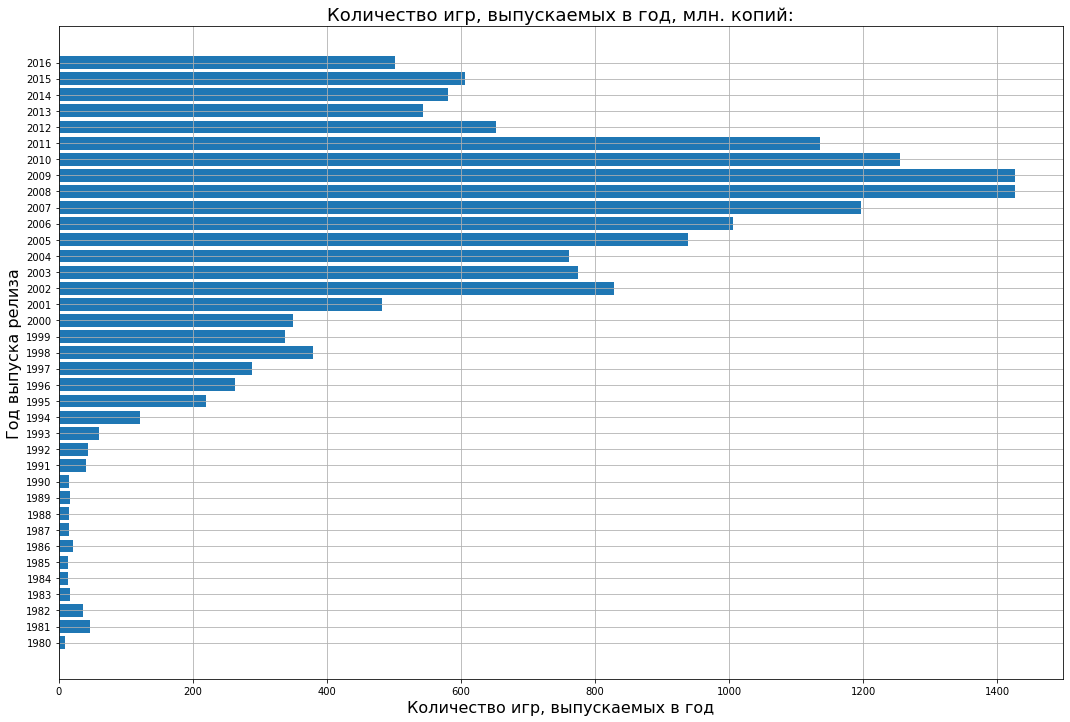

In [65]:
# построим график, отображающий количество выпускаемых игр в год:

figure, ax = plt.subplots(figsize=(18, 12))

ax.barh(data_year.year_of_release, data_year.sales)

ax.set_title('Количество игр, выпускаемых в год, млн. копий:', fontsize=18)
ax.set_ylabel('Год выпуска релиза', fontsize = 16)
ax.set_xlabel('Количество игр, выпускаемых в год', fontsize = 16)
ax.grid()
ax.legend=True

ax.set_yticks(data_year.year_of_release) # Задаем тики по оси Y

plt.show()


Начиная с середины девяностых выделяется резкий рост выпущенных игр, продолжающийся до 2008 года. Пик выпуска игр было в 2008-2009 годах. После 2011 года наблюдается резкое снижение количества выпуска игр до конца периода исследования.

Из полученного графика можно сделать вывод, что данные до 2000 года не так важны.


### Изменения количества продаж по платформам

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

Ответим на вопрос: "За какой характерный срок появляются новые и исчезают старые платформы?"

In [66]:
# вывод первых строк:

data_clear.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38


In [67]:
# сводная таблица по суммарным продажам по платформам
# отсортируем по убыванию суммарных продаж
# выведем первые двадцать платформ:

data_clear.pivot_table( \
        index='platform', values='total_sales', aggfunc='sum') \
        .sort_values(by='total_sales', ascending=False) \
        .head(20)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


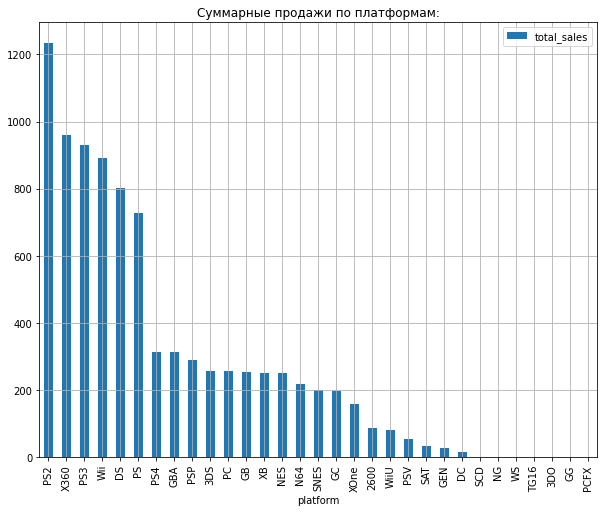

In [68]:
# построим график распределения суммарных продаж по платформам

data_clear.pivot_table( \
        index='platform', values='total_sales', aggfunc='sum') \
        .sort_values(by='total_sales', ascending=False) \
        .plot( \
              kind='bar', \
              figsize=(10, 8), \
              grid=True, \
              title = 'Суммарные продажи по платформам:');

In [69]:
# подсчитаем общее количество платформ:

data_clear.platform.nunique()

31

Из полученного графика выберем платформы с наибольшими суммарными продажами. Всего 6 платформ с наибольшими суммарными продажами. Одна из них - это PS2 - лидирует на фоне остальных. 

Сделаем отдельный датафрейм с топ-10 платформами. Другие платформы исключим из исследования, чтобы не портить дальнейшие показатели. Остальные платформы - их осталось 21шт. - будут нам искажать данные, если их оставить.  

In [70]:
# запишем в `top_10_platform` топ 10 платформ
# с самыми большими суммарными продажами:

top_10_platform = data_clear.pivot_table( \
                index='platform', values='total_sales', aggfunc='sum') \
                .sort_values(by='total_sales', ascending=False) \
                .head(10)


In [71]:
# выведем top_10_platform с самыми большими суммарными продажами:

top_10_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Построим распределение топ-10 платформ по годам. Сперва сделаем отдельный список с топ-10 платформ:

In [72]:
# добавим индексы к датафрейму с топ-10 платформами:

top_10_platform = top_10_platform.reset_index()
top_10_platform

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88
8,PSP,289.53
9,3DS,257.81


In [73]:
# лист из топ-10 платформ с самыми большими суммарными продажами:

top_10_platform_list = list(top_10_platform['platform'])

In [74]:
# топ-10 платформ с наибольшими суммарными продажами:

top_10_platform_list

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']

In [75]:
# сделаем новый датафрейм `top_10`, в который положим данные только для платформ, 
# попавших в `top_10_platform_list` с самыми большими суммарными продажами:

top_10 = data_clear.query('platform in @top_10_platform_list')

In [76]:
# выведем несколько значений из top_10:

top_10.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91


In [77]:
# общее количество строк top_10:

top_10.shape[0]

12170

In [78]:
# Построим распределение топ-10 платформ с самыми большими суммарными продажами по годам:

top_10_by_year = top_10.pivot_table( \
            index=['platform', 'year_of_release'], \
            values='total_sales', aggfunc='sum') \
            .reset_index() 


In [79]:
# вывод топ-10 платформ с самыми большими суммарными продажами

top_10_by_year

,platform,year_of_release,total_sales
0,3DS,2011,63.20
1,3DS,2012,51.36
2,3DS,2013,56.57
3,3DS,2014,43.76
4,3DS,2015,27.78
...,...,...,...
92,X360,2012,99.74
93,X360,2013,88.58
94,X360,2014,34.74
95,X360,2015,11.96


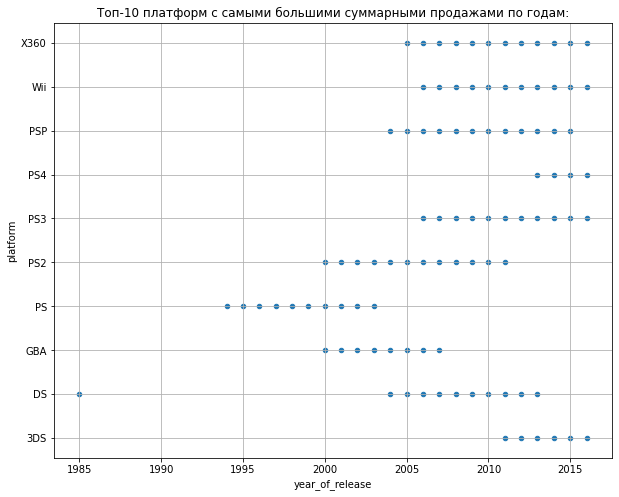

In [80]:
# построим график зависимосити топ-10 платформ с самыми большими суммарными продажами по годам
# в качестве графика выберем scatterplot, т.к. он лучше всего подходит в данном случае:

top_10_by_year.plot( \
            x='year_of_release', y='platform', kind='scatter', \
            grid=True, figsize=(10, 8), \
            title='Топ-10 платформ с самыми большими суммарными продажами по годам:');


На графике можно отметить аномальное появление платформы DS в 1985 году. Судя по данным на Википедии https://ru.wikipedia.org/wiki/Nintendo_DS, консоль Nintendo DS была выпущена в 2004 году. Выведем эти данные:


In [81]:
# вывод аномальных данных по платформе DS за 1985 год:

data_clear.query('platform == "DS" and year_of_release == 1985')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15704,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1.0,-1.0,unknown,0.02


В 1985 году платформы DS не существовало. Это явно ошибка. Удалим эту запись в дальнейшем.

Чтобы построить распределение топ-10 платформ с наибольшими суммарными продажами по всем годам развернем датафрейм `top_10` следующим образом:

In [82]:
# создание датафрейма с топ-10 платформами с наимбольшими суммарными продажами по всему периоду:

top_10_platform_by_all_year = top_10.pivot_table( \
    index='platform', columns='year_of_release', \
    values='total_sales', aggfunc='sum')

top_10_platform_by_all_year.head()

year_of_release,1985,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,,,,
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.20,51.36,56.57,43.76,27.78,15.14
DS,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.27,130.14,119.81,146.94,145.31,119.54,85.02,26.18,11.01,1.54,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07,61.53,74.16,56.67,77.91,33.86,5.28,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PS,NaN,6.03,35.96,94.7,136.17,169.49,144.53,96.37,35.59,6.67,2.07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PS2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.17,166.43,205.38,184.31,211.81,160.66,103.42,75.99,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN


В таблице отсутствует много значений - значит в эти годы вообще не было такой платформы: либо её еще не создали, либо она уже перестала существовать. В дальнейшем удалим эти данные. 

Далее построим hitmap топ-10 платформ с наимбольшими суммарными продажами по всем годам:

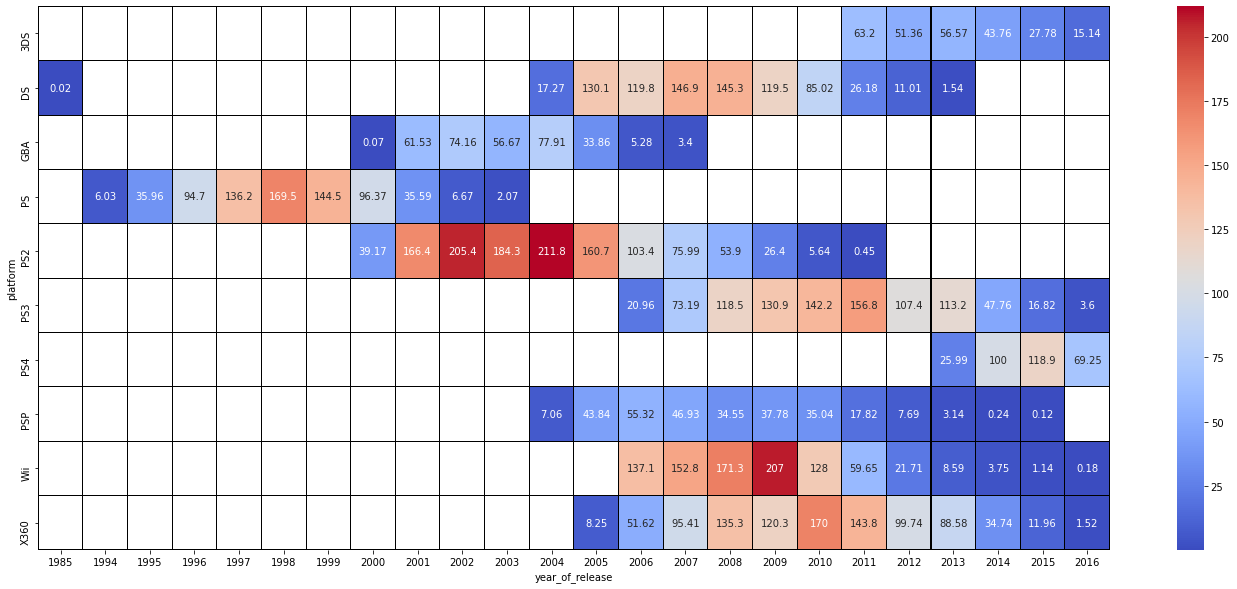

In [83]:
# построим тепловую карту с топ-10 платформами
# с наимбольшими суммарными продажами по всему периоду:

fig, ax = plt.subplots(figsize=(24, 10))

sns.heatmap \
    (top_10_platform_by_all_year, cmap="coolwarm", annot= True, \
     linewidths=.01, linecolor='black', fmt='.4g');


Из проведенного анализа сделаем следующие выводы:
    
   - обнаружили аномалию - платформу `DS` за 1985 год;
   - составили список топ-10 платформ с самыми большими продажами по годам;
   - в список топ-10 вошли следующие платформы: `PS2`, `X360`, `PS3`, `Wii`, `DS`, `PS`, `PS4`, `GBA`, `PSP`, `3DS`;
   - платформы `PS2`, `PS`, `GBA` и `DS` в последние годы потеряли свои рейтинги по продажам;
   - остальные шесть платформ по-прежнему занимают топовые места по продажам;
   - самые новые платформы - это `PS4` и `3DS`;
   - опираясь на график "Топ-10 платформ с самыми большими суммарными продажами по годам" и тепловую карту, можно ответить на вопрос о том, что средняя продолжительность жизни платформы занимает порядка 10 лет и новые платформы появляются в среднем каждые 2-3 года;
   - на основе тепловой карты прослеживается следующий жизненный цикл платформы: чтобы выйти на топовый уровень продаж платформам требуется в среднем порядка 2-3 лет. Далее платформа удерживает топовые позиции по продажам в течение 5 лет, а дальше идет спад. 
   
    

### Определение актуального периода

На основе построенного графика "Топ-10 платформ с самыми большими суммарными продажами по годам", тепловой карты, а также предыдущего вывода определим актуальный период.

Самой новой платформой является `PS4`, которая стартовала в 2013 году. Но в том же году перестала существовать платформа `DS`. Чтобы данные были максимально полные примем в качестве актуального периода данные с 2014 (включительно) по 2016 годы.

### Обновление данных с учетом выбранного актуального периода

In [84]:
# создадим датафрейм `data_actual`, в нём будем использовать данные по всем платформам 
# за актуальный период - с 2014 года:

data_actual = data_clear.copy()
data_actual = data_actual.query('year_of_release >= 2014')

In [85]:
# выведем список платформ в data_actual:

data_actual.platform.unique()

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'X360', 'PC', 'Wii', 'PSV',
       'PSP'], dtype=object)

Создали датафрейм `data_actual`, в который входят данные по платформам за период с 2014г по 2016г. 

### Лидирующие платформы по количеству продаж

Далее проанализируем следующие вопросы:
     
   - какие платформы лидируют по продажам, растут или падают? 
   - выберем несколько потенциально прибыльных платформ.

In [86]:
# построим таблицу зависимости платформ по объему продаж:

data_actual.pivot_table( \
        index='platform', values='total_sales', aggfunc='sum'). \
        sort_values(by='total_sales', ascending=False).head(10)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


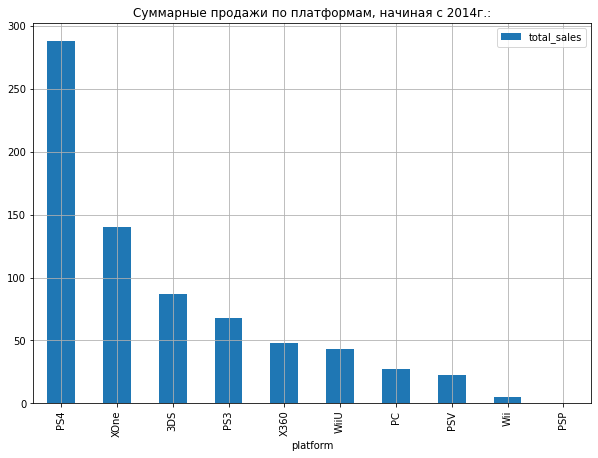

In [87]:
# для наглядного представления построим график зависимости платформ по продажам:

data_actual.pivot_table( \
    index='platform', values='total_sales', aggfunc='sum') \
    .sort_values(by='total_sales', ascending=False) \
    .plot(kind='bar', figsize=(10, 7), grid=True, \
    title = 'Суммарные продажи по платформам, начиная с 2014г.:');


Как видно из таблицы лидирует по объему продаж `PS4`. 

В топ 5 платформ входят: `PS4`, `XOne`, `3DS`, `PS3`, `X360`.

Далее выведем данные по годам.

In [88]:
# таблица зависимости суммарных продаж по платформам по годам:

data_actual_from_2014 = data_actual.pivot_table( \
        index='platform', 
        columns='year_of_release',
        values='total_sales',
        aggfunc='sum')

data_actual_from_2014


year_of_release,2014,2015,2016
platform,,,
3DS,43.76,27.78,15.14
PC,13.28,8.52,5.25
PS3,47.76,16.82,3.60
PS4,100.00,118.90,69.25
PSP,0.24,0.12,NaN
PSV,11.90,6.25,4.25
Wii,3.75,1.14,0.18
WiiU,22.03,16.35,4.60
X360,34.74,11.96,1.52


Из таблицы сделать выводы о том растут или падают продажи по платформам сложно, поэтому построим тепловую карту: 

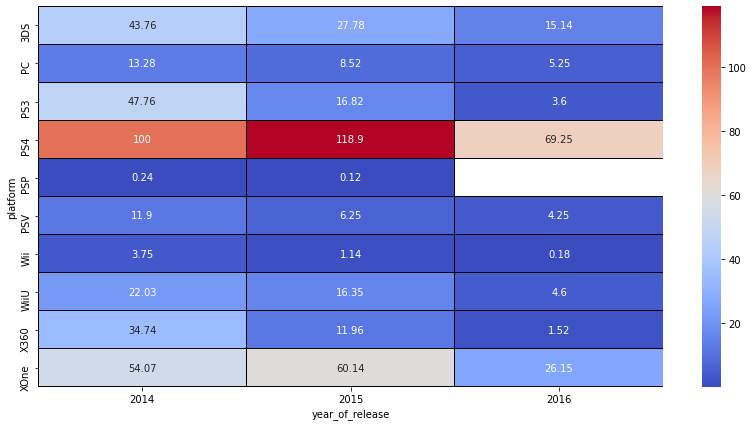

In [89]:
# тепловая карта суммарных продаж по платформам, начиная с 2014 года:

fig, ax = plt.subplots(figsize=(14, 7))

sns.heatmap(data_actual_from_2014, cmap="coolwarm", annot= True, \
    linewidths=.01, linecolor='black', fmt='.4g');


`PS4` - однозначный лидер по продажам. Рост продаж растет. В 2015 году суммарные продажи максимальные. Но в 2016 году продажи упали почти вдвое. Возможно данные за 2016 год не полные и из-за этого такая просадка по продажам. Даже не смотря на сильный спад по продажам, `PS4` - однозначный лидер и эту платформу можно однозначно отнести к потенциально прибыльной платформе.

В качестве следующей потенциально прибыльной платформы можно взять `XOne`. Продажи, начиная с 2014 года, росли. В 2016г продажи упали. Возможно, что год еще идет и данных не хватает.

Что касается остальных платформ - заметен спад продаж. Поэтому их не включим в список потенциально прибыльных платформ.



### "Ящик с усами" по глобальным продажам игр в разбивке по платформам

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

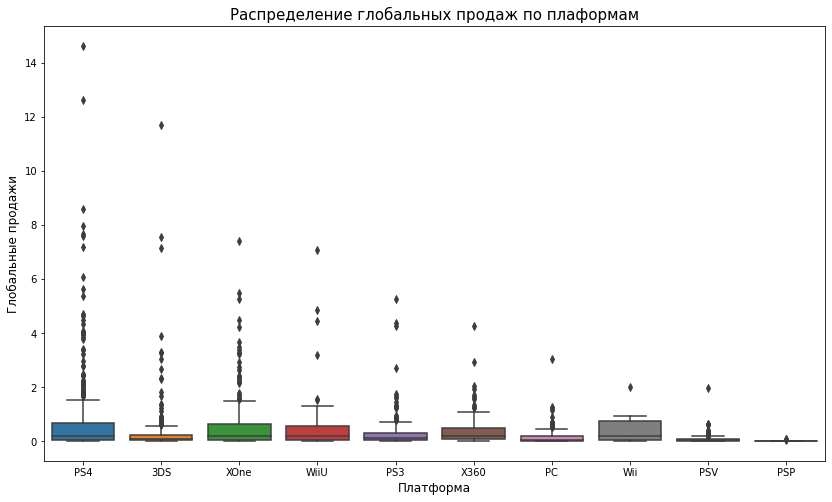

In [90]:
# «ящик с усами» по глобальным продажам игр в разбивке по платформам:

plt.figure(figsize=(14,8))

ax = sns.boxplot(data=data_actual, y="total_sales", x='platform')
ax.set_title('Распределение глобальных продаж по плаформам', fontsize=15)
ax.set_xlabel('Платформа', fontsize=12)
ax.set_ylabel('Глобальные продажи', fontsize=12)
plt.show()

Изменим масштаб графика. По оси `y` примем логарифмическую ось, для наглядного представления медиан и квантилей:

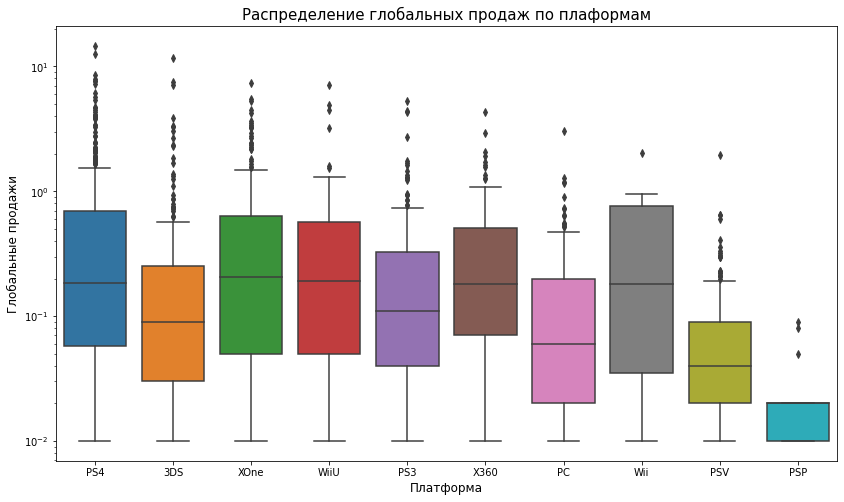

In [91]:
# «ящик с усами» по глобальным продажам игр в разбивке по платформам

plt.figure(figsize=(14,8))


ax = sns.boxplot(data=data_actual, y="total_sales", x='platform')
ax.set_title('Распределение глобальных продаж по плаформам', fontsize=15)
ax.set_xlabel('Платформа', fontsize=12)
ax.set_ylabel('Глобальные продажи', fontsize=12)

ax.set_yscale('log')

plt.show()

На графиках наблюдаем выбросы. Распределение значений глобальных продаж скошено вправо. В данном случае это означает, что существует большое количество игр, объем продаж которых намного выше медианных значений. Это касается `PS4` и `3DS` - в данных платформах есть игры с очень высоким уровнем продаж.

Медианные значения суммарных продаж у платформ `PS4`, `XOne`, `WiiU`, `X360` и `Wii` примерно одинаковые.

Наименьшее медианное значение суммарных продаж у платформы `PSP`.



### Влияние отзывов на продажи одной платформы

В этом пункте посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.

Для исследования возьмем самую потенциально-прибыльную платформу - `PS4`. Сделаем для `PS4` отдельный датафрейм:

In [92]:
# датасет с данными по платформе PS4:

data_ps4 = data_actual.query('platform == "PS4"')


In [93]:
# check:

data_ps4.head(5)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


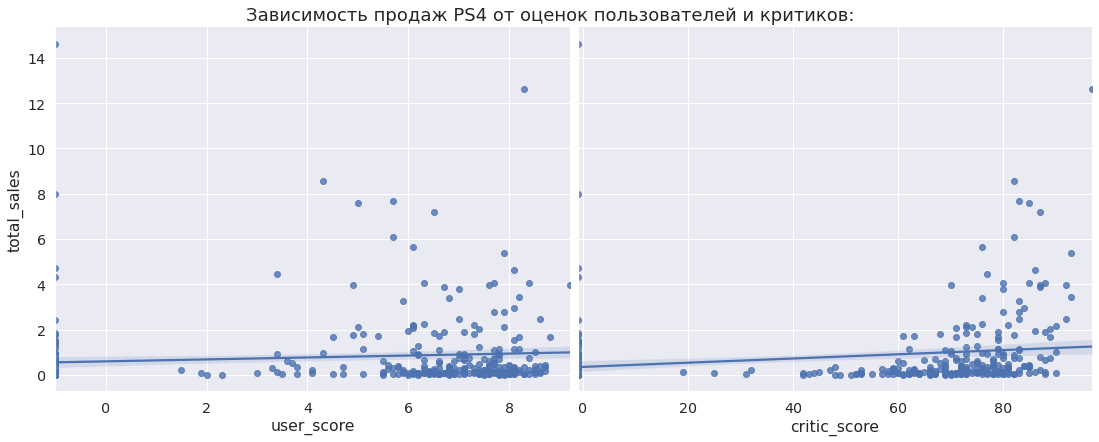

In [94]:
# построим диаграмму рассеяния зависимости продаж по платформе PS4
# от оценок пользователей и от оценок критиков:


sns.set(font_scale=1.3)
ax = sns.pairplot(
    data_ps4,
    x_vars=['user_score', 'critic_score'], 
    y_vars='total_sales',
    height=6, aspect=1.3,
    kind='reg'    
    );
ax.fig.suptitle('Зависимость продаж PS4 от оценок пользователей и критиков:', \
                y=1.02, size=18)

plt.show()


Из диаграммы сделаем вывод:

   - наблюдаются выбросы в данных;
   - оценки пользователей не влияют на суммарный объем продаж `PS4` - судя по графику, зависимость очень слабая; 
   - оценки критиков также не влияют на суммарный объём продаж - также наблюдается очень слабая зависимость.

Далее выведем коэффициенты корреляционной зависимости: 


In [95]:
# вывод коэффициентов корреляционной зависимости суммарных продаж PS4 
# от оценок пользователей и критиков:

data_ps4[['user_score', 'critic_score', 'total_sales']].corr()


,user_score,critic_score,total_sales
user_score,1.000000,0.909339,0.104115
critic_score,0.909339,1.000000,0.210847
total_sales,0.104115,0.210847,1.000000


Коэффициенты корреляционной зависимости подтвердили выводы, сделанные после построения диаграммы рассеяния: 

   - оценки пользователей не влияют на суммарный объем продаж по платформе `PS4` - коэфф. зависимости очень слабый: `0.1`;
   - оценки критиков также слабо влияют на суммарные продажи `PS4` - коэфф. зависимости очень слабый: `0.21`.
     

Ранее пропуски в столбцах `user_score` и `critic_score` мы заменили заглушкой в виде числа `-1`. Посмотрим теперь на значения коэффициентов корреляционной зависимости без этих данных. Для чего сделаем срез данных, не будем учитывать строки, где в столбцах `user_score` и `critic_score` встречаются `-1`.

Сперва проанализируем зависимость продаж `PS4` от оценок пользователей без учета заглушек.

In [96]:
# сделаем срез данных - без учета заглушек

data_ps4_user_score_without_plug = data_ps4.loc[data_ps4['user_score'] != -1]

In [97]:
# check:

print('Общее количество оценок пользователей по платформе PS4:', len(data_ps4['user_score']))
print('Количество оценок пользователей по платформе PS4 без учета заглушек:', \
      len(data_ps4_user_score_without_plug['user_score']))
print('Общее количество заглушек:', len(data_ps4.query('user_score == -1')))
print('Проверка количества заглушек в срезе:', \
      len(data_ps4_user_score_without_plug.query('user_score == -1')))


Общее количество оценок пользователей по платформе PS4: 376
Количество оценок пользователей по платформе PS4 без учета заглушек: 242
Общее количество заглушек: 134
Проверка количества заглушек в срезе: 0


Убедились в отсутствии заглушек. Построим отдельную диаграмму рассеяния влияния оценок пользователей на суммарные продажи `PS4` без учета заглушек.

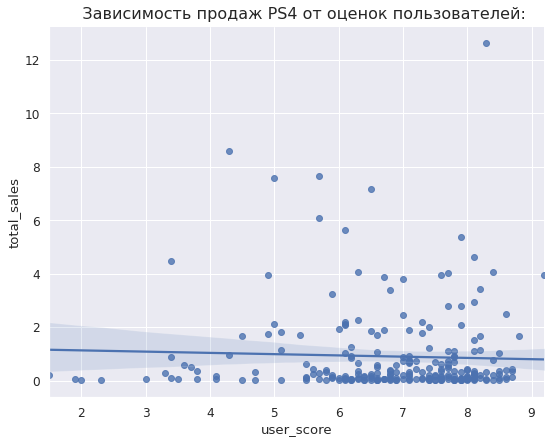

In [98]:
# диаграмма рассеяния зависимости продаж по платформе PS4
# от оценок пользователей без учета заглушек

sns.set(font_scale=1.1)
ax = sns.pairplot(
    data_ps4_user_score_without_plug,
    x_vars=['user_score'], 
    y_vars='total_sales',
    height=6, aspect=1.3,
    kind='reg'    
    );
ax.fig.suptitle('           Зависимость продаж PS4 от оценок пользователей:', y=1.02, size=16)

plt.show()

Далее выведем коэффициенты корреляционной зависимости оценок пользователей на суммарные продажи:

In [99]:
# вывод коэффициентов корреляционной зависимости суммарных продаж PS4 
# от оценок пользователей без учета заглушек

data_ps4_user_score_without_plug[['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,-0.040132
total_sales,-0.040132,1.000000


Получили коэффициент корреляционной зависимости оценок пользователей на суммарные продажи `PS4` `-0.04`. Это означает, что оценки пользователей не влияют на продажи `PS4`.

Далее проанализируем зависимость продаж `PS4` от оценок критиков, без учета заглушек.

In [100]:
# сделаем срез данных - без учета заглушек

data_ps4_critic_score_without_plug = data_ps4.loc[data_ps4['critic_score'] != -1]

In [101]:
# check:

print('Общее количество оценок критиков по платформе PS4:', len(data_ps4['critic_score']))
print('Количество оценок критиков по платформе PS4 без учета заглушек:', \
      len(data_ps4_critic_score_without_plug['critic_score']))
print('Общее количество заглушек:', len(data_ps4.query('critic_score == -1')))
print('Проверка количества заглушек в срезе:', \
      len(data_ps4_critic_score_without_plug.query('critic_score == -1')))


Общее количество оценок критиков по платформе PS4: 376
Количество оценок критиков по платформе PS4 без учета заглушек: 237
Общее количество заглушек: 139
Проверка количества заглушек в срезе: 0


Убедились в отсутствии заглушек. Построим отдельную диаграмму рассеяния влияния оценок критиков на суммарные продажи `PS4` без учета заглушек.

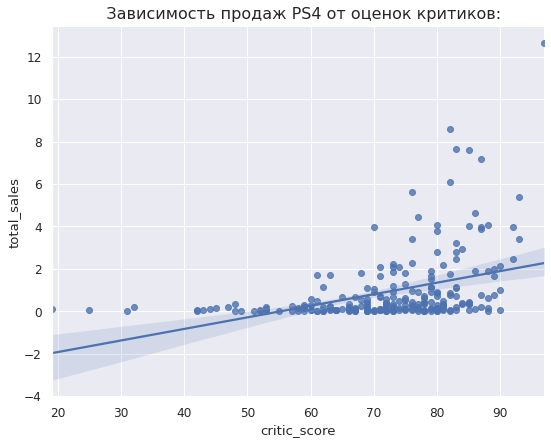

In [102]:
# диаграмма рассеяния зависимости продаж по платформе PS4
# от оценок критиков без учета заглушек

sns.set(font_scale=1.1)
ax = sns.pairplot(
    data_ps4_critic_score_without_plug,
    x_vars=['critic_score'], 
    y_vars='total_sales',
    height=6, aspect=1.3,
    kind='reg'    
    );
ax.fig.suptitle('           Зависимость продаж PS4 от оценок критиков:', y=1.02, size=16)

plt.show()

Далее выведем коэффициенты корреляционной зависимости оценок критиков на суммарные продажи:

In [103]:
# вывод коэффициентов корреляционной зависимости суммарных продаж PS4 
# от оценок критиков без учета заглушек

data_ps4_critic_score_without_plug[['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.402661
total_sales,0.402661,1.000000


Коэффициенты немного изменились, но они глобально не изменят ранее полученного вывода:

   - оценки пользователей не влияют на суммарный объем продаж по платформе `PS4` - коэфф. отрицательный `-0.04`;
   - оценки критиков слабо влияют на суммарные продажи `PS4` - коэфф. положительный и равен `0.4`.

### Влияние отзывов на продажи по всем платформам

Теперь проанализируем влияние оценок пользователей и экспертов на суммарные продажи по всем платформам.
Сразу возьмем срез данных - не будем учитывать данные, где в столбцах с оценками пользователей и критиков стоят `-1`.


In [104]:
# срез данных по столбцам с оценками пользователей и критиков
# данные без учета заглушек

data_actual_user_score_without_plug = \
        data_actual.loc[data_actual['user_score'] != -1]
data_actual_critic_score_without_plug = \
        data_actual.loc[data_actual['critic_score'] != -1]


In [105]:
# check:

print('Общее количество оценок пользователей по всем платформам:', len(data_actual['user_score']))
print('Количество оценок пользователей по всем платформам без учета заглушек:', \
      len(data_actual_user_score_without_plug['user_score']))
print('Общее количество заглушек:', len(data_actual.query('user_score == -1')))
print('Проверка количества заглушек в срезе:', \
      len(data_actual_user_score_without_plug.query('user_score == -1')))

Общее количество оценок пользователей по всем платформам: 1689
Количество оценок пользователей по всем платформам без учета заглушек: 888
Общее количество заглушек: 801
Проверка количества заглушек в срезе: 0


In [106]:
# check:

print('Общее количество оценок критиков по всем платформам:', len(data_actual['critic_score']))
print('Количество оценок критиков по всем платформам без учета заглушек:', \
      len(data_actual_critic_score_without_plug['critic_score']))
print('Общее количество заглушек:', len(data_actual.query('critic_score == -1')))
print('Проверка количества заглушек в срезе:', \
      len(data_actual_critic_score_without_plug.query('critic_score == -1')))

Общее количество оценок критиков по всем платформам: 1689
Количество оценок критиков по всем платформам без учета заглушек: 718
Общее количество заглушек: 971
Проверка количества заглушек в срезе: 0


У бедились в отсутствии заглушек в выборках

In [107]:
# список платформ без заглушек:

print(data_actual_user_score_without_plug['platform'].unique())
print(data_actual_critic_score_without_plug['platform'].unique())

['PS4' 'WiiU' 'XOne' 'PS3' 'X360' '3DS' 'PC' 'Wii' 'PSV']
['PS4' 'WiiU' 'XOne' '3DS' 'PC' 'X360' 'PS3' 'PSV']


У нас попали не все платформы. Сделаем список для большего количества платформ:

In [108]:
# сделаем список с платформами:

data_platforms_list = \
    data_actual_user_score_without_plug['platform'].unique().tolist()

data_platforms_list

['PS4', 'WiiU', 'XOne', 'PS3', 'X360', '3DS', 'PC', 'Wii', 'PSV']

3DS


user_score     0.215193
total_sales    1.000000
Name: total_sales, dtype: float64

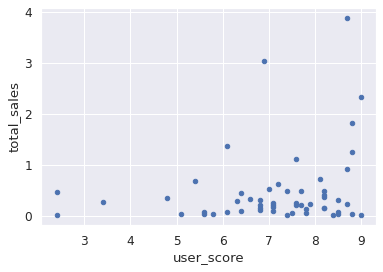

critic_score    0.314117
total_sales     1.000000
Name: total_sales, dtype: float64

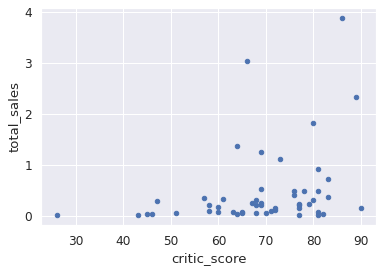

PC


user_score    -0.071597
total_sales    1.000000
Name: total_sales, dtype: float64

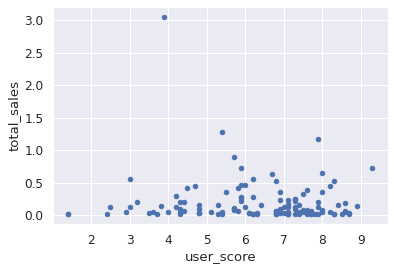

critic_score    0.174634
total_sales     1.000000
Name: total_sales, dtype: float64

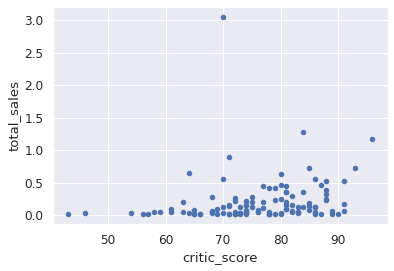

PS3


user_score    -0.166761
total_sales    1.000000
Name: total_sales, dtype: float64

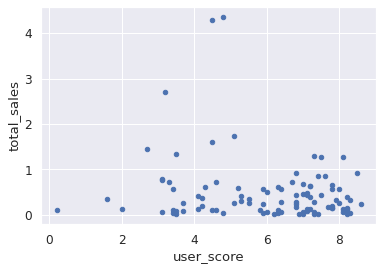

critic_score    0.446575
total_sales     1.000000
Name: total_sales, dtype: float64

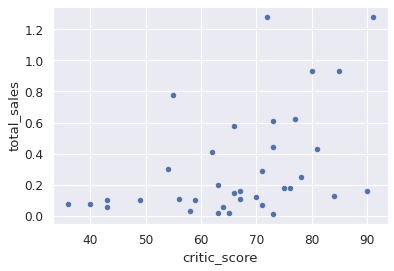

PS4


user_score    -0.040132
total_sales    1.000000
Name: total_sales, dtype: float64

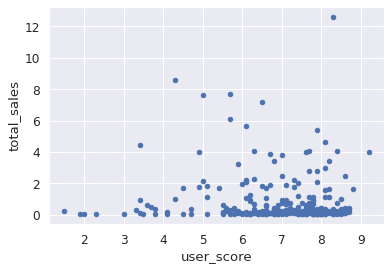

critic_score    0.402661
total_sales     1.000000
Name: total_sales, dtype: float64

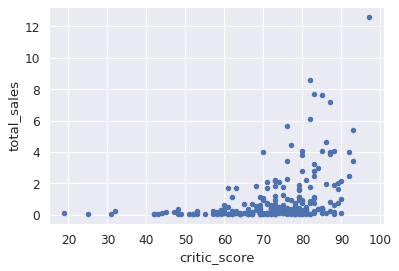

PSP
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
PSV


user_score    -0.168455
total_sales    1.000000
Name: total_sales, dtype: float64

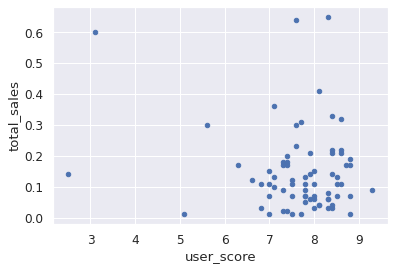

critic_score    0.042665
total_sales     1.000000
Name: total_sales, dtype: float64

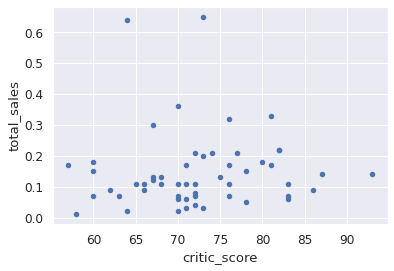

Wii
Для платформы Wii не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы Wii не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
WiiU


user_score     0.407926
total_sales    1.000000
Name: total_sales, dtype: float64

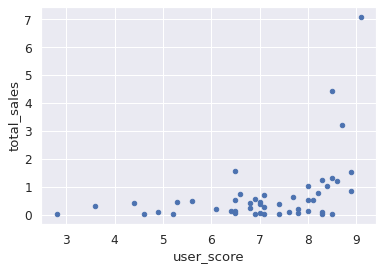

critic_score    0.370201
total_sales     1.000000
Name: total_sales, dtype: float64

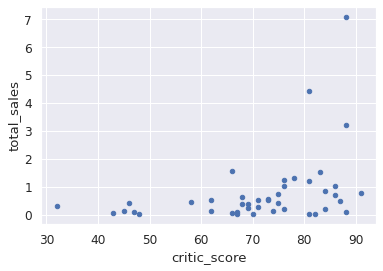

X360


user_score    -0.138445
total_sales    1.000000
Name: total_sales, dtype: float64

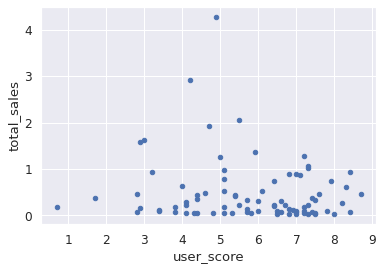

critic_score    0.525723
total_sales     1.000000
Name: total_sales, dtype: float64

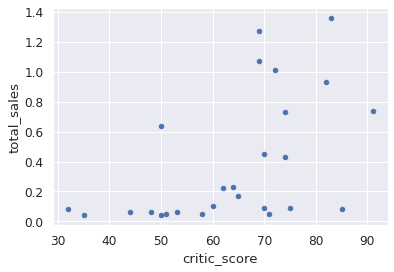

XOne


user_score    -0.070384
total_sales    1.000000
Name: total_sales, dtype: float64

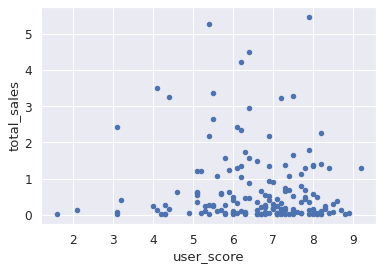

critic_score    0.428677
total_sales     1.000000
Name: total_sales, dtype: float64

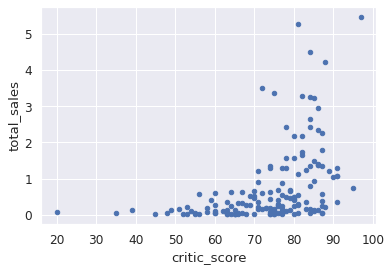

In [109]:
# вывод диаграмм рассеяния и коэффициентов корреляционной зависимости
# влияния оценок пользователей и критиков на суммарные продажи по всем платформам

df_sc, y = data_actual.copy(), 'total_sales'

for platform, games_on_pl in df_sc.groupby('platform'):
    print('=' * 90)
    print(platform)
    
    # считаем сколько в колонке не пустых отзывов:
    not_user = len(games_on_pl[(games_on_pl.user_score != -1) \
                & (games_on_pl['user_score'].notna() == True)])
    
    not_critic = len(games_on_pl[(games_on_pl.critic_score != -1) \
                & (games_on_pl['user_score'].notna() == True)])
    
    sum_not = 10 # Задаем количество не пустых значений для вывода диаграммы и расчета корреляции
    
    if not_user > sum_not:
        games_on_pl[games_on_pl.user_score != -1].plot( \
                kind='scatter', x='user_score', y=y, color='b')        
        display(games_on_pl[games_on_pl.user_score != -1] \
                [['user_score', y]].corr()[y])
        plt.show()
    
    else:
        print('Для платформы', platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей')
    
    if not_critic > sum_not:
        games_on_pl[games_on_pl.critic_score != -1].plot( \
                kind='scatter', x='critic_score', y=y, color='b')
        display(games_on_pl[games_on_pl.critic_score != -1] \
                [['critic_score', y]].corr()[y])
        plt.show()
    
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов критиков')

Итак, сделаем выводы:

   - слабую корр. зависимость между оценками пользователей и суммарными продажами зафиксировали для платформы: `WiiU` (`0.4`); 
   - для остальных платформ коэффициенты корр. зависимости между оценками пользователей и суммарными продажами отсутствуют;
   - между оценками критиков и суммарными продажами зафиксировали слабую связь корреляционной зависимости со следующими коэффициентами: 
     - `PS3` (`0.47`),
     - `XOne` (`0.43`),
     - `PS4` (`0.4`),
     - `WiiU` (`0.37`),
     - `3DS` (`0.31`)
   - среднюю корр. зависимость между оценками критиков и суммарными продажами зафиксировали для платформы `X360` (`0.53`)
   - для остальных платформ отсутствует корр. зависимость между оценками критиков и суммарными продажами.
     
Еще можно сделать вывод о том, что оценки критиков чуть сильнее влияют на суммарные продажи, в отличии от оценок пользователей. 


### Общее распределение игр по жанрам

В этом разделе мы посмотрим на общее распределение игр по жанрам. Ответим на вопросы:

   - что можно сказать о самых прибыльных жанрах? 
   - выделяются ли жанры с высокими и низкими продажами?
    

Найдем самые прибыльные жанры. Сгруппируем данные по жанру и найдем медианные суммарные продажи. Подсчитаем продажи по медиане из-за наличия выбросов, а медиана менее чувствительна к выбросам:

In [110]:
# пивот таблицы с медианными продажами по жанрам:

data_genre_median = data_actual.pivot_table( \
    index='genre', values='total_sales', aggfunc = 'median') \
    .sort_values(by = 'total_sales', ascending = False)
data_genre_median
                                                                                             

,total_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


Построим график распределения суммарных продаж в зависимости от жанра:

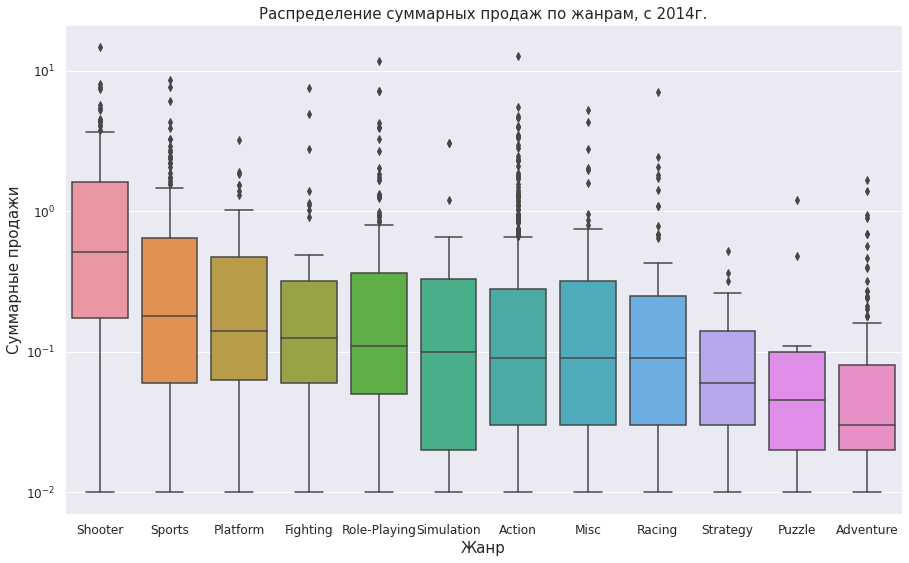

In [111]:
# график распределения продаж по жанрам:

plt.figure(figsize=(15,9))


ax = sns.boxplot( \
            data=data_actual, y="total_sales", x='genre', order = data_genre_median.index)
ax.set_title('Распределение суммарных продаж по жанрам, с 2014г.', fontsize=15)
ax.set_xlabel('Жанр', fontsize=15)
ax.set_ylabel('Суммарные продажи', fontsize=15)
ax.set(yscale="log") # по оси y примем логарифмическую ось для наглядности
plt.show()

Действительно наблюдаются выбросы данных. Так в жанре `Action` большое количество продаж, которые значительно превышают медианное значение продаж.

Построим гистограмму распределения медианных продаж по жанрам:

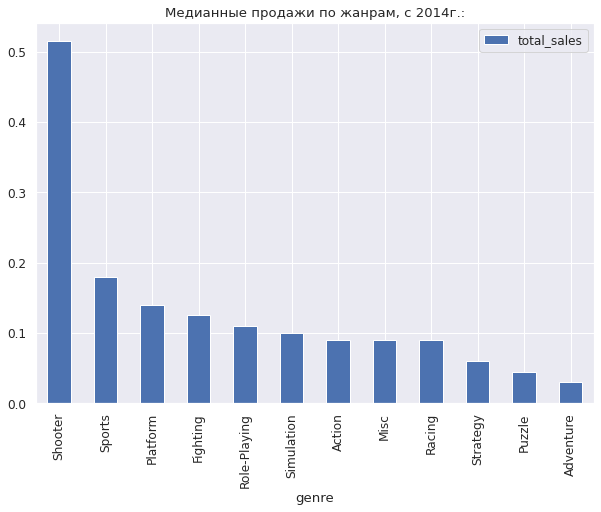

In [112]:
# график медианных продаж по жанрам:

data_genre_median.plot(kind='bar', figsize=(10, 7), grid=True, \
    title = 'Медианные продажи по жанрам, с 2014г.:');


Самым продаваемым жанром по всем платформам с 2014г является `Shooter` - `0.515 млн.` проданных копий.
Второй по продаваемости жанр - это `Sports` - `0.18 млн.` проданных копий по всем платформам. На эти жанры следует обратить внимание при выборе потенциально-прибыльной платформы.

Жанры с самыми низкими продажами по всем платформам с 2014г. - это `Puzzle` (`0.045 млн.` копий) и `Adventure` (`0.03 млн.` копий). На них тоже стоит обратить внимание при выборе прибыльных платформ.

### Выводы

Проведен исследовательский анализ данных, после которого можно сделать следующие выводы.

Начиная с середины девяностых годов выделяется резкий рост выпущенных игр, продолжающийся до 2008 года. Пик выпуска игр было в 2008-2009 годах. После 2011 года наблюдается резкое снижение количества выпуска игр до конца периода исследования. 

Для того чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании, мы выявили, что весь период исследования нам не нужен. В ходе исследования выявили актуальный период - это период с 2014 по 2016г.

Определили топ 5 платформ с самыми большими продажами: `PS4`, `XOne`, `3DS`, `PS3`, `X360`. `PS4` - однозначный лидер по продажам. Рост продаж растет. В 2015 году суммарные продажи максимальные. В качестве следующей потенциально прибыльной платформы можно взять `XOne`. Продажи, начиная с 2014 года, росли.

Платформы с самыми низкими продажами с 2014г. - `PC`, `PSV`, `Wii`, `PSP`.

Рассмотрели влияние отзывов пользователей и критиков на продажи `PS4`. Вычислили коэффициенты корреляции между оценками пользователей и критиков на суммарные продажи. Как выяснили, оценки пользователей не влияют на суммарный объем продаж по платформе `PS4` - коэфф. корреляционной зависимости отрицательный и практически равен нулю (`-0.04`).
Оценки критиков слабо влияют на суммарные продажи `PS4` - коэфф. положительный и равен `0.4`. Видимо действительно хорошая платформа и никто не обращает внимание на оценки перед покупкой. Еще раз отметим эту платформу в качестве самой потенциально-прибыльной. 

Еще рассмотрели влияние отзывов пользователей и критиков на продажи остальных платформ. Выявили слабую зависимость между оценками пользователей и суммарными продажами для платформ `WiiU`(`0.4`). Для остальных платформ зависимость не наблюдается. Между оценками критиков и суммарными продажами наблюдается слабая положительная корр. зависимость для `PS3`(`0.47`)), `XOne`(`0.43`), `PS4`(`0.4`), `WiiU`(`0.37`), `3DS`(`0.31`). Среднюю корр. зависимость обнаружили между оценками критиков и суммарными продажами для платформы `X360`(`0.53`). Пришли к выводу, что оценки критиков чуть сильнее влияют на суммарные продажи, в отличии от оценок пользователей.  

Вычислили самый продаваемый жанр по всем платформам с 2014г - это `Shooter` - `0.515 млн.` проданных копий. Второй по продаваемости жанр - это `Sports` - `0.18 млн.` проданных копий по всем платформам. На эти жанры следует обратить внимание при выборе потенциально-прибыльной платформы. Жанры с самыми низкими продажами по всем платформам с 2014г. - это `Puzzle` (`0.045 млн.` копий) и `Adventure` (`0.03 млн.` копий). На них тоже стоит обратить внимание при выборе прибыльных платформ.


## Портрет пользователя каждого региона

[Назад к содержанию](#Содержание)

Определим для пользователя каждого региона (`NA`, `EU`, `JP`):

   - самые популярные платформы (топ-5), опишем различия в долях продаж;
   - самые популярные жанры (топ-5), поясним разницу.
   - влияние рейтинга `ESRB` на продажи в отдельном регионе.
    

### Поиск самых популярных платформ

Выведем таблицу с суммарными продажами игровых платформ по каждому региону.


In [113]:
# таблица с суммарными продажами платформ по каждому региону (млн/ копий):

data_sales_by_region = data_actual \
    .pivot_table( 
                index='platform',
                values=['na_sales', 'eu_sales', 'jp_sales'],
                aggfunc='sum')
data_sales_by_region


,eu_sales,jp_sales,na_sales
platform,,,
3DS,16.12,44.24,22.64
PC,17.97,0.00,7.23
PS3,25.54,11.22,22.05
PS4,130.04,15.02,98.61
PSP,0.00,0.36,0.00
PSV,3.53,14.54,2.52
Wii,2.59,0.00,2.08
WiiU,13.15,7.31,19.36
X360,15.49,0.08,28.30


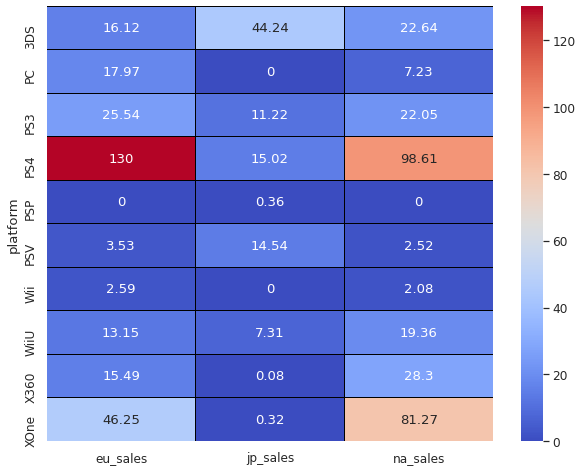

In [114]:
# тепловая карта суммарных продаж платформ для каждого региона:

fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(data_sales_by_region, cmap="coolwarm", annot= True, linewidths=.01, \
            linecolor='black', fmt='.4g');


Как ранее уже определили, `PS4` и `XOne` являются платформами с самыми большими суммарными продажами. Правда, исходя из построенной тепловой карты, видно, что продажи `PS4` и `XOne` на высоте в Северной Америке и в Европе. А в Японии обнаружился новый лидер продаж - `3DS`. На втором месте с большим отставанием в Японии `PS4`. 


Далее выведем долю продаж платформ от общего объема продаж в регионе.


In [115]:
# доля продаж игровой платформы от общей суммы продаж в регионе:

data_region_fraction = data_sales_by_region.apply(lambda x: round(x / x.sum(), 2))
data_region_fraction


,eu_sales,jp_sales,na_sales
platform,,,
3DS,0.06,0.48,0.08
PC,0.07,0.00,0.03
PS3,0.09,0.12,0.08
PS4,0.48,0.16,0.35
PSP,0.00,0.00,0.00
PSV,0.01,0.16,0.01
Wii,0.01,0.00,0.01
WiiU,0.05,0.08,0.07
X360,0.06,0.00,0.10


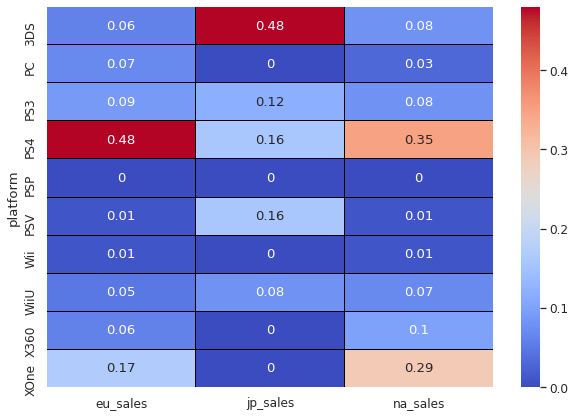

In [116]:
# тепловая карта доли продаж платформ от суммарных продаж в регионе:

fig, ax = plt.subplots(figsize=(10, 7))

sns.heatmap(data_region_fraction, cmap="coolwarm", annot= True, \
            linewidths=.01, linecolor='black', fmt='.4g');


Выведем самые популярные платформы (топ-5) по каждому региону:


In [117]:
# получим список регионов:

region_list = [column for column in data_sales_by_region]
region_list


['eu_sales', 'jp_sales', 'na_sales']

In [118]:
# вывод топ-5 платформ по регионам:

for region in region_list:
    if region == 'eu_sales':
        ans = 'Европе'
    if region == 'jp_sales':
        ans = 'Японии'
    if region == 'na_sales':
        ans = 'Северной Америке'
    print(f'     Топ-5 платформ в {ans}:')
    display(data_region_fraction.sort_values(by = region, ascending=False)[region] \
            .reset_index().head(5))
    print()

     Топ-5 платформ в Европе:


,platform,eu_sales
0,PS4,0.48
1,XOne,0.17
2,PS3,0.09
3,PC,0.07
4,3DS,0.06



     Топ-5 платформ в Японии:


,platform,jp_sales
0,3DS,0.48
1,PS4,0.16
2,PSV,0.16
3,PS3,0.12
4,WiiU,0.08



     Топ-5 платформ в Северной Америке:


,platform,na_sales
0,PS4,0.35
1,XOne,0.29
2,X360,0.10
3,3DS,0.08
4,PS3,0.08


Лидеры топ-5 платформ в Северной Америке и в Европе одинаковые - это `PS4` и `XOne`. Видимо похожие вкусы. Доля продаж этих платформ от общего количества продаж игровых платформ составляет:

   - для Северной Америке - `PS4` (`0.35`), `XOne` (`0.29`);
   - для Европы - `PS4` (`0.48` - это почти половина всего игрового рынка), `XOne` (`0.17`)
    
Топ-5 платформ в Северной Америке: `PS4`, `XOne`, `X360`, `3DS` и `PS3`.

Топ-5 платформ в Европе: `PS4`, `XOne`, `PS3`, `PC`, `3DS`.

В Японии свои вкусы. По всей видимости так сложилось исторически, поскольку в Японии много своих разработанных платформ. 

Топ-5 платформ в Японии: `3DS`, `PS4`, `PSV`, `PS3`, `WiiU`. Доля продаж `3DS` в Японии составляет `0.48`. Почти половина игрового рынка.

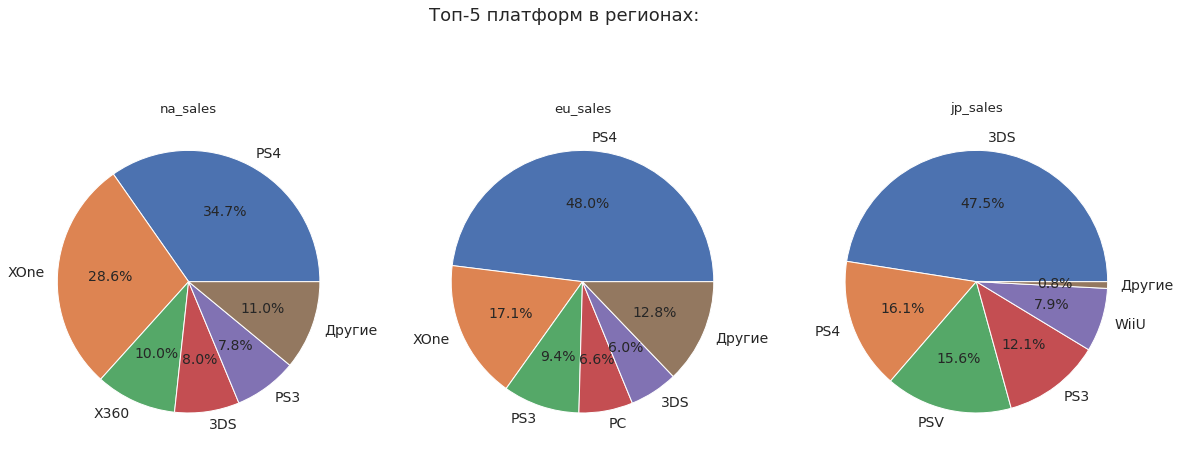

In [119]:
# круговые диаграммы топ-5 платформ по регионам

fig, ax = plt.subplots(1, 3, figsize = (20, 8))
fig.suptitle('Топ-5 платформ в регионах:', fontsize = 18)

for region in ['na_sales', 'eu_sales', 'jp_sales']:
    i = ['na_sales', 'eu_sales', 'jp_sales'].index(region)
    data_for_platforms = data_actual.groupby('platform')[region].sum().reset_index() \
    .sort_values(region, ascending = False, ignore_index = True).head(5)
    data_for_platforms = data_for_platforms.append({'platform': 'Другие', region: data_actual[region].sum() - \
    data_for_platforms[region].sum()}, ignore_index = True)
    ax[i].pie(data_for_platforms[region], labels = data_for_platforms['platform'], autopct = '%1.1f%%', \
        textprops={'fontsize': 14})
    ax[i].set_title(region)
plt.show()

### Поиск самых популярных жанров

Теперь проделаем все предыдущие операции для поиска самых популярных жанров по каждому региону.

In [120]:
# таблица суммарных продаж игр по жанрам, в зависимости от региона (млн/ копий):

data_sales_by_genre = data_actual \
    .pivot_table( \
            index='genre',
            values=['na_sales', 'eu_sales', 'jp_sales'],
            aggfunc='sum')

data_sales_by_genre


,eu_sales,jp_sales,na_sales
genre,,,
Action,74.68,29.58,72.53
Adventure,6.49,3.60,5.64
Fighting,6.69,6.37,12.43
Misc,12.86,5.61,15.05
Platform,6.80,2.69,6.79
Puzzle,0.52,0.93,0.65
Racing,14.13,1.76,8.74
Role-Playing,28.17,31.16,33.47
Shooter,65.52,4.87,79.02


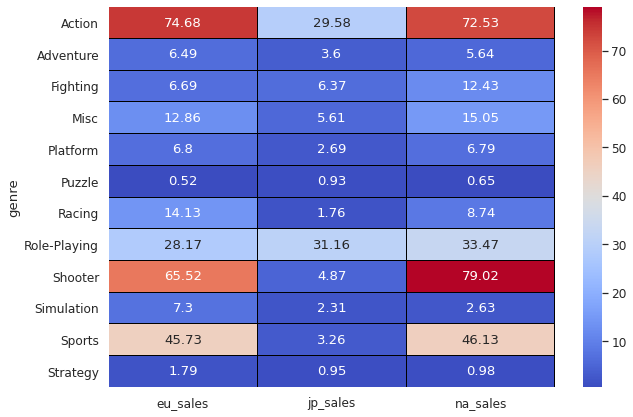

In [121]:
# тепловая карта суммарных продаж игр по жанрам, в зависимости от региона:

fig, ax = plt.subplots(figsize=(10, 7))

sns.heatmap(data_sales_by_genre, cmap="coolwarm", annot= True, linewidths=.01, \
    linecolor='black', fmt='.4g');


В Северной Америке и Европе снова прослеживаются общие предпочтения по выбору жанра игры. Для данных регионов можно выделить три жанра с самыми высокими продажами: `Action`, `Shooter` и `Sports`. Причем суммарные продажи в этих регионах практически одинаковые.

У японцев свой вкус. Можно выделить два самых любимых жанра: `Role-Playing` и `Action`. `Action`, как и в Европе и в Америке, также входит в топ любимых жанров.

Далее выведем долю популярных жанров от среди общего объема проданных игр в регионе.


In [122]:
# доля продаж популярных жанров от общего объема продаж в регионе:

data_sales_by_genre_fraction = data_sales_by_genre.apply(lambda x: round(x / x.sum(), 2))
data_sales_by_genre_fraction



,eu_sales,jp_sales,na_sales
genre,,,
Action,0.28,0.32,0.26
Adventure,0.02,0.04,0.02
Fighting,0.02,0.07,0.04
Misc,0.05,0.06,0.05
Platform,0.03,0.03,0.02
Puzzle,0.00,0.01,0.00
Racing,0.05,0.02,0.03
Role-Playing,0.10,0.33,0.12
Shooter,0.24,0.05,0.28


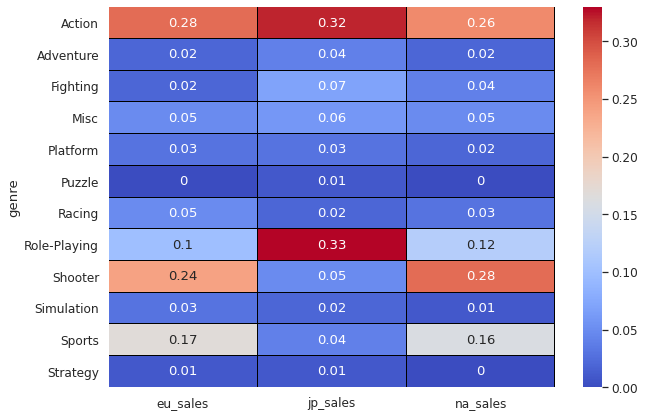

In [123]:
# тепловая карта доли продаж популярных жанров от общего объема продаж в регионе:

fig, ax = plt.subplots(figsize=(10, 7))

sns.heatmap(data_sales_by_genre_fraction, cmap="coolwarm", annot= True, \
            linewidths=.01, linecolor='black', fmt='.4g');



Выведем самые популярные игровые жанры (топ-5) по каждому региону:
    
    

In [124]:
# вывод топ-5 игровых жанров по регионам:

for region in region_list:
    if region == 'eu_sales':
        ans = 'Европе'
    if region == 'jp_sales':
        ans = 'Японии'
    if region == 'na_sales':
        ans = 'Северной Америке'
    print(f'     Топ-5 игровых жанров в {ans}:')
    display(data_sales_by_genre_fraction.sort_values(by = region, ascending=False)[region] \
            .reset_index().head(5))
    print()
    

     Топ-5 игровых жанров в Европе:


,genre,eu_sales
0,Action,0.28
1,Shooter,0.24
2,Sports,0.17
3,Role-Playing,0.10
4,Misc,0.05



     Топ-5 игровых жанров в Японии:


,genre,jp_sales
0,Role-Playing,0.33
1,Action,0.32
2,Fighting,0.07
3,Misc,0.06
4,Shooter,0.05



     Топ-5 игровых жанров в Северной Америке:


,genre,na_sales
0,Shooter,0.28
1,Action,0.26
2,Sports,0.16
3,Role-Playing,0.12
4,Misc,0.05


Построим круговые диаграммы топ-5 жанров по регионам

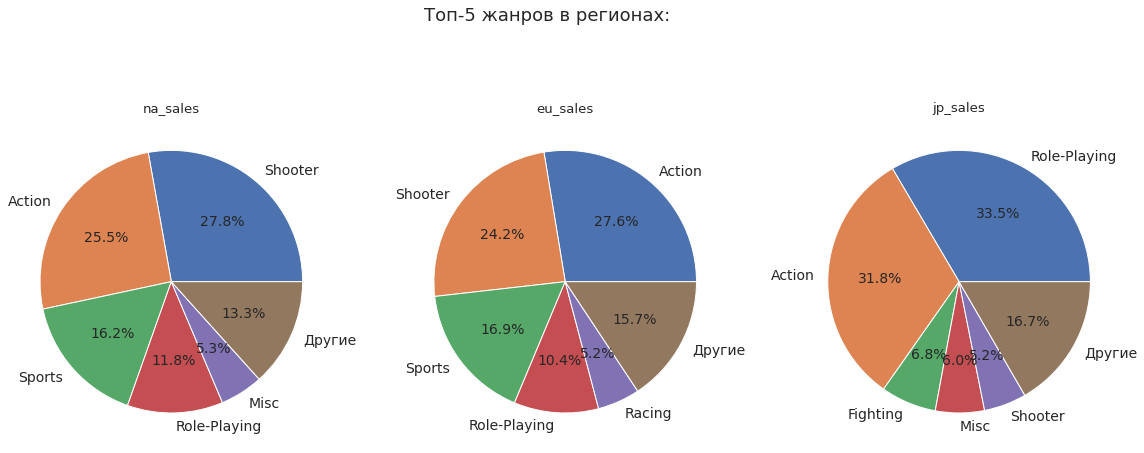

In [125]:
# круговые диаграммы топ-5 жанров по регионам

fig, ax = plt.subplots(1, 3, figsize = (20, 8))
fig.suptitle('Топ-5 жанров в регионах:', fontsize = 18)

for region in ['na_sales', 'eu_sales', 'jp_sales']:
    i = ['na_sales', 'eu_sales', 'jp_sales'].index(region)
    data_for_genres = data_actual.groupby('genre')[region].sum().reset_index() \
    .sort_values(region, ascending = False, ignore_index = True).head(5)
    data_for_genres = data_for_genres.append({'genre': 'Другие', region: data_actual[region].sum() - \
    data_for_genres[region].sum()}, ignore_index = True)
    ax[i].pie(data_for_genres[region], labels = data_for_genres['genre'], autopct = '%1.1f%%', \
        textprops={'fontsize': 14})
    ax[i].set_title(region)
plt.show()

Итак, игровые предпочтения в Европе и Северной Америке практически одинаковые. В топ-5 жанров входят: `Shooter`, `Action`, `Sports`, `Role-Playing` и `Misc`. Отличия только в первом месте: в Европе на первом месте `Action`, тогда как в Северной Америке - `Shooter`.

Еще раз убедились в том, что вкусы в Европе и Северной Америке одинаковые. Здесь играют в одни и те же игры.

В Японии в топ-5 жанров входят: `Role-Playing`, `Action`, `Fighting`, `Misc` и `Shooter`. Топ-5 жанров почти совпадают с Европой и Северной Америкой. Отличия состоят в распределении жанров по занимаемым местам, например, на первом месте у японцев `Role-Playing`, тогда как в Европе и Северной Америке данный жанр стоит на предпоследнем месте в топ-5. Также в Японии присутствует жанр `Fighting`, тогда как в Северной Америке и Европе этот жанр не входит в топ-5. Видимо у японцев действительно свой вкус, менталитет и предпочтения. Этот рынок можно рассматривать как некий обособленный игровой рынок.


### Влияние рейтинга `ESRB` на продажи в отдельном регионе

In [126]:
# вывод первых строк:

data_actual.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1.0,-1.0,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,unknown,7.98


Выведем сводную таблицу с суммарными продажами игр по рейтингу `ESRB` для каждого региона.


In [127]:
# сводная таблица суммарных продаж в зависимости от рейтинга игры (млн/ копий):

data_by_rating = data_actual.pivot_table(index='rating', \
    values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
data_by_rating.reset_index()


,rating,eu_sales,jp_sales,na_sales
0,E,58.06,8.94,50.74
1,E10+,26.16,4.46,33.23
2,M,93.44,8.01,96.42
3,T,34.07,14.78,38.95
4,unknown,58.95,56.90,64.72


Ранее пропуски в столбце с рейтингом игры мы заменили на `unknown`.

Построим тепловую карту для наглядного представления показателей.

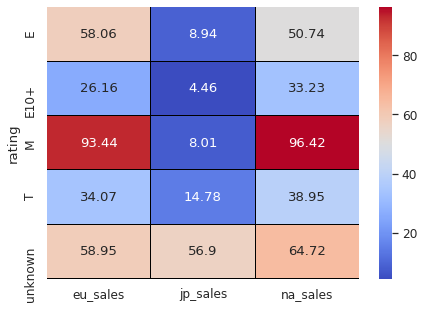

In [128]:
# тепловая карта суммарных продаж игр по рейтингам, в зависимости от региона:

fig, ax = plt.subplots(figsize=(7, 5))

sns.heatmap(data_by_rating, cmap="coolwarm", annot= True, linewidths=.01, linecolor='black', fmt='.4g');


Прослеживается зависимость продаж от рейтинга.

По рейтингам Северная Америка и Европа также похожи. Большинство игр здесь покупают с рейтингами `M`, `E`. Реже для `Т` и `E10+`.

У японцев все по-своему - лидируют рейтинги `Т`, `Е` и `М`. Реже - `E10+`. Япония - отдельный рынок.

Большое количество продаж занимают игры с пропущенным рейтингом, который мы заменили на `unknown`. Согласно описанию рейтинга `ESRB` на сайтах https://www.esrb.org/ https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board этот рейтинг предназначен для маркировки игр в США и Канаде. Поэтому в Европе и в Японии так много было пропусков в столбце с рейтингом игр. Однако, и в Северной Америке большое количество продаж игр без данного рейтинга. Скорее всего это продажи игр, не из США и Канады, например из той же Европы ил других стран, где не предусмотрен рейтинг `ESRB`.

Построим круговые диаграммы топ-рейтингов по регионам

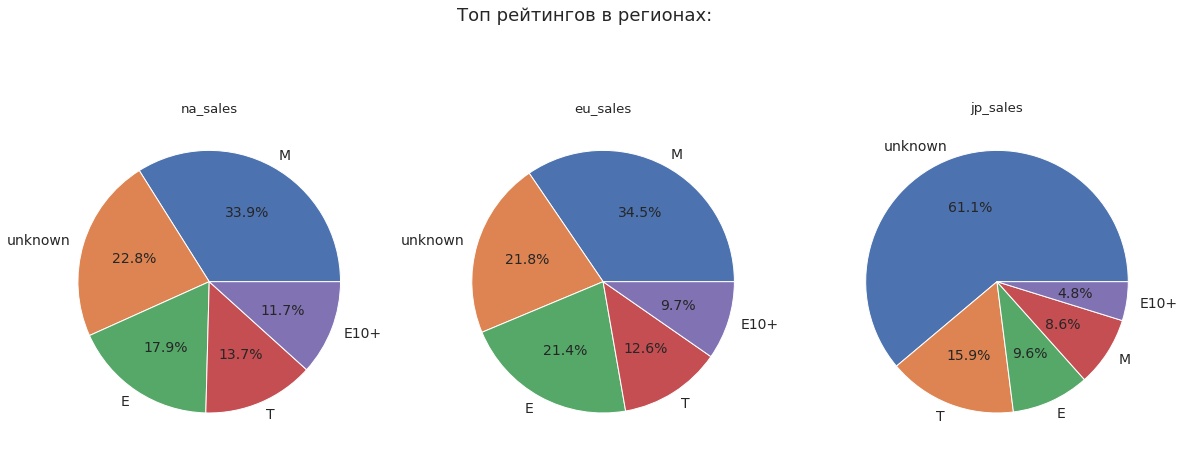

In [129]:
# круговые диаграммы топ рейтингов по регионам

fig, ax = plt.subplots(1, 3, figsize = (20, 8))
fig.suptitle('Топ рейтингов в регионах:', fontsize = 18)

for region in ['na_sales', 'eu_sales', 'jp_sales']:
    i = ['na_sales', 'eu_sales', 'jp_sales'].index(region)
    data_for_rating = data_actual.groupby('rating')[region].sum().reset_index() \
    .sort_values(region, ascending = False, ignore_index = True).head(5)
    ax[i].pie(data_for_rating[region], labels = data_for_rating['rating'], autopct = '%1.1f%%', \
        textprops={'fontsize': 14})
    ax[i].set_title(region)
plt.show()

### Выводы

1. Нашли топ-5 платформ с максимальными суммарными продажами в Северной Америке, Европе и Японии. 

Топ-5 платформ в Северной Америке: `PS4`, `XOne`, `X360`, `3DS` и `PS3`.

Топ-5 платформ в Европе: `PS4`, `XOne`, `PS3`, `PC`, `3DS`.
Предпочтения у пользователей в игровых платформах в Северной Америке и Европе схожи.
Большая доля продаж платформы `PS4` в Северной Америке и Европе: `0.35` и `0.48`, соответственно. В Европе `PS4` занимает почти половину всех платформ.

В Японии свои вкусы. По всей видимости так сложилось исторически, поскольку в Японии много своих разработанных платформ.
Топ-5 платформ в Японии: `3DS`, `PS4`, `PSV`, `PS3`, `WiiU`. Доля продаж `3DS` в Японии составляет `0.48`. Почти половина игрового рынка.

2. Определили наиболее популярные игровые жанры в Северной Америке, Европе и Японии.
Игровые предпочтения в Европе и Северной Америке практически одинаковые. В топ-5 жанров входят: `Shooter`, `Action`, `Sports`, `Role-Playing` и `Misc`. Отличия только в первом месте: в Европе на первом месте `Action`, тогда как в Северной Америке - `Shooter`.

В Японии в топ-5 жанров входят: `Role-Playing`, `Action`, `Fighting`, `Misc` и `Shooter`. Топ-5 жанров почти совпадают с Европой и Северной Америкой. Отличия состоят в распределении жанров по занимаемым местам, например, на первом месте у японцев `Role-Playing`, тогда как в Европе и Северной Америке данный жанр стоит на предпоследнем месте в топ-5. Также в Японии присутствует жанр `Fighting`, тогда как в Северной Америке и Европе этот жанр не входит в топ-5. Видимо у японцев действительно свой вкус, менталитет и предпочтения. Этот рынок можно рассматривать как некий обособленный игровой рынок.

3. Прослеживается зависимость продаж от рейтинга.

По рейтингам Северная Америка и Европа также похожи. Большинство игр здесь покупают с рейтингами `M`, `E`. Реже для `Т` и `E10+`.

У японцев лидируют рейтинги `Т`, `Е` и `М`. Реже - `E10+`. 

Неоднократно пришли к выводу, что Япония - отдельный рынок. Возможно это связано с менталитетом пользователей. Также многие платформы изначально были созданы в Японии для внутреннего рынка. Поэтому Японию нужно рассматривать как отдельный, не зависимый игровой рынок.

В исходных данных было большое количество пропусков в столбце с рейтингом. Выяснили, что `ESRB`-рейтинг предназначен для маркировки игр в США и Канаде. Поэтому в исходном датасете пропуски - это продажи игр, выпущенных в странах где не предусмотрен рейтинг `ESRB`. Т.е. пропуски являются признаком, что игра имеет другой рейтинг и выпускалась не в Северной Америке.


## Проверка гипотез

[Назад к содержанию](#Содержание)

Поставим и проверим две гипотезы:

1. Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые.
2. Средние пользовательские рейтинги жанров `Action` и `Sports` разные.

### Гипотеза 1
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Сформулируем нулевую гипотезу `Н0`: Средний пользовательский рейтинг игр на платформе `Xbox One` `равен` среднему пользовательскому рейтингу игр на платформе `PC`.

Сформулируем альтернативную гипотезу `Н1`: Средний пользовательский рейтинг игр на платформе `Xbox One` `не равен` среднему пользовательскому рейтингу игр на платформе `PC`.

Пороговое значение `alpha` примем равным `0.05`.

Оценки пользователей по платформам `XOne` и `PC` не связаны друг с другом. Поэтому для расчёта `p-value` можем воспользоваться критерием Стьюдента `t.ttest_ind`. Для применения критерия Стьюдента выборки должны иметь нормальные распределения и их дисперсии не должны сильно отличаться. Проверим далее распределение с помощью `QQ-plot`.

А сперва сделаем выборку данных, т.к. в оценках пользователей и критиков мы проставили заглушку `-1`. Отфильтруем данные - исключим "заглушки".


In [131]:
# сохраним в отдельные переменные выборки оценок пользователей
# по платформам XOne и PC:

data_xone = data_actual.query('platform == "XOne" and user_score != -1')['user_score']
data_pc = data_actual.query('platform == "PC" and user_score != -1')['user_score']


Проверим нормальность распределения в выборках `data_xone` и `data_pc` с помощью `QQ-plot`.


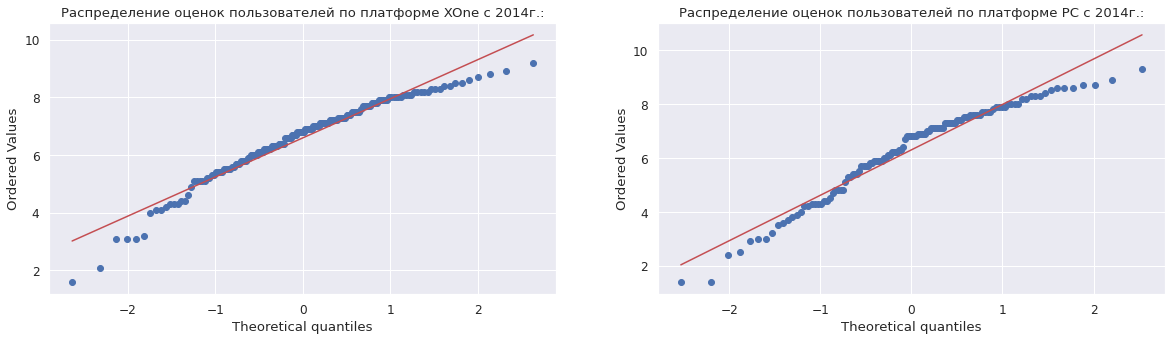

In [132]:
# строим QQ-plot для для определения того, соответствуют ли данные 
# data_xone и data_pc нормальному распределению:

plt.figure(figsize=(20,5))

ax_xone = plt.subplot(121)

st.probplot(data_xone, dist = "norm", plot = plt) 
ax_xone.set_title('Распределение оценок пользователей по платформе XOne с 2014г.:')

ax_pc = plt.subplot(122)

st.probplot(data_pc, dist = "norm", plot = plt)
ax_pc.set_title('Распределение оценок пользователей по платформе PC с 2014г.:')

plt.show()


По графикам `qq-plot` видно, что распределения выборок близки к нормальным. Поэтому для расчёта `p-value` воспользуемся критерием Стьюдента `st.ttest_ind`.


`Н0`: Средний пользовательский рейтинг игр на платформе `Xbox One` `равен` среднему пользовательскому рейтингу игр на платформе `PC`.

`Н1`: Средний пользовательский рейтинг игр на платформе `Xbox One` `не равен` среднему пользовательскому рейтингу игр на платформе `PC`.

In [133]:
# results = вызов метода для проверки гипотезы

results = st.ttest_ind(
    data_xone,
    data_pc,
    equal_var = False
)

# alpha = задание значения уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
print('p-значение: ', round(results.pvalue, 2))

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    

p-значение:  0.12
Не получилось отвергнуть нулевую гипотезу


После прохождения теста получили следующие значения: 

    `p-value` = `0.12` 
    `p-value` > `alpha(0.05)`
    
В связи с полученными значениями у нас нет оснований отвергать нулевую гипотезу. Т.е. мы подтвердили нулевую гипотезу `Н0`: Средний пользовательский рейтинг игр на платформе `Xbox One` `равен` среднему пользовательскому рейтингу игр на платформе `PC`.


Чтобы еще раз убедиться в верности гипотезы, выведем средний пользовательский рейтинг игр на платформах `Xbox One` и `PC`.

In [134]:
# средние пользовательские рейтинги игр на платформах Xbox One и PC

print('Средний пользовательский рейтинг игр на платформе Xbox One:', round(data_xone.mean(), 2))
print('Средний пользовательский рейтинг игр на платформе PC:', round(data_pc.mean(), 2))

Средний пользовательский рейтинг игр на платформе Xbox One: 6.59
Средний пользовательский рейтинг игр на платформе PC: 6.3


Подтвердили цифрами - средний пользовательский рейтинг игр на платформе `Xbox One` равен среднему пользовательскому рейтингу игр на платформе `PC`.

### Гипотеза 2
Средние пользовательские рейтинги жанров `Action` и `Sports` разные.

Сформулируем нулевую гипотезу `Н0`: Средний пользовательский рейтинг игр жанра `Action` равен среднему пользовательскому рейтингу игр жанра `Sports`.

Сформулируем альтернативную гипотезу `Н1`: Средний пользовательский рейтинг игр жанра `Action` не равен среднему пользовательскому рейтингу игр жанра `Sports`.

Пороговое значение `alpha` примем равным `0.05`.

Оценки пользователей по жанрам игр не связаны друг с другом. Поэтому для расчёта `p-value` также как и в предыдущем расчете воспользуемся критерием Стьюдента `st.ttest_ind`.

Для применения критерия Стьюдента выборки должны иметь нормальные распределения и их дисперсии не должны сильно отличаться.

Избавимся сперва от "заглушек".


In [136]:
# сохраним в отдельные переменные выборки оценок пользователей
# по жанрам Action и Sports:

data_action = data_actual.query('genre == "Action" and user_score != -1')['user_score']
data_sports = data_actual.query('genre == "Sports" and user_score != -1')['user_score']


Проверим нормальность распределения в выборках `data_action` и `data_sports` с помощью `QQ-plot`.

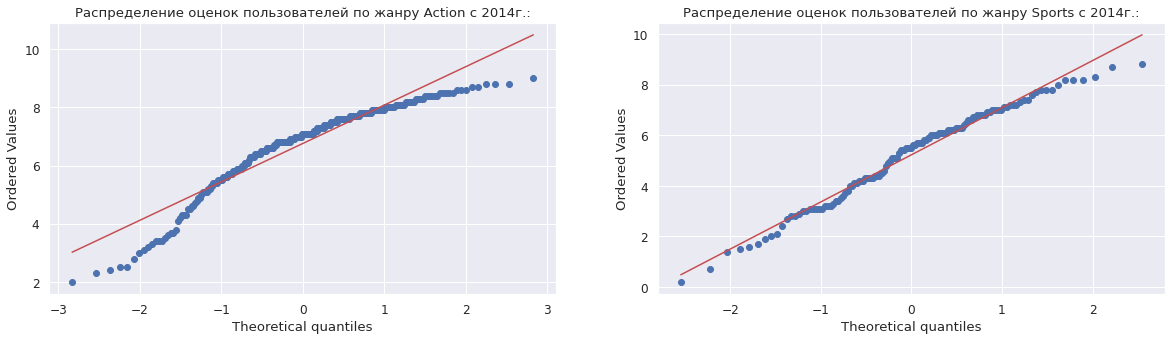

In [137]:
# строим QQ-plot для для определения того, соответствуют ли данные 
# data_action и data_sports нормальному распределению:

plt.figure(figsize=(20,5))

ax_action = plt.subplot(121)

st.probplot(data_action, dist = "norm", plot = plt) 
ax_action.set_title('Распределение оценок пользователей по жанру Action с 2014г.:')

ax_sports = plt.subplot(122)

st.probplot(data_sports, dist = "norm", plot = plt)
ax_sports.set_title('Распределение оценок пользователей по жанру Sports с 2014г.:')

plt.show()



Данные по жанру `Action` немного хуже распределены в отличие от данных по жанру `Sports`. Но в целом примем, что распределения выборок близки к нормальным.  
Поэтому для расчёта `p-value` воспользуемся критерием Стьюдента `st.ttest_ind`.


`Н0`: Средний пользовательский рейтинг игр жанра `Action` `равен` среднему пользовательскому рейтингу игр жанра `Sports`.

`Н1`: Средний пользовательский рейтинг игр жанра `Action` `не равен` среднему пользовательскому рейтингу игр жанра `Sports`.


In [138]:
# results = вызов метода для проверки гипотезы

results = st.ttest_ind(
    data_action,
    data_sports,
    equal_var = False
)

# alpha = задание значения уровня значимости
alpha = 0.05

# вывод значения p-value на экран 
print('p-значение: ', round(results.pvalue, 10))

# условный оператор с выводом строки с ответом
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 
    

p-значение:  0.0
Отвергаем нулевую гипотезу


После прохождения теста получили следующие значения:

    `p-value` практически равен нулю 
    `p-value` < `alpha(0.05)` 

В связи с полученными значениями у нас есть основания отвергнуть нулевую гипотезу и принять альтернативную гипотезу `Н1`: Средний пользовательский рейтинг игр жанра `Action` `не равен` среднему пользовательскому рейтингу игр жанра `Sports`.


Чтобы еще раз убедиться в том, что средние пользовательские рейтинги жанров `Action` и `Sports` разные, выведем их числовые значения.

In [139]:
# средние пользовательские рейтинги жанров Action и Sports

print('Средний пользовательский рейтинг игр жанра Action:', round(data_action.mean(), 2))
print('Средний пользовательский рейтинг игр жанра Sports:', round(data_sports.mean(), 2))

Средний пользовательский рейтинг игр жанра Action: 6.76
Средний пользовательский рейтинг игр жанра Sports: 5.23


Подтвердили цифрами - средний пользовательский рейтинг игр жанра `Action` не равен среднему пользовательскому рейтингу игр жанра `Sports`.

## Выводы


В данном шаге мы проверили 2 гипотезы:

1) Средние пользовательские рейтинги платформ `Xbox One` и `PC` одинаковые;
2) Средние пользовательские рейтинги жанров `Action` и `Sports` разные.
    
Для проверки первой гипотезы сформулировали нулевую и альтирнативную гипотезы следующим образом:
   
   - нулевая гипотеза `Н0`: Средний пользовательский рейтинг игр на платформе `Xbox One` `равен` среднему пользовательскому рейтингу игр на платформе `PC`;
    
   - альтернативная гипотеза `Н1`: Средний пользовательский рейтинг игр на платформе `Xbox One` `не равен` среднему пользовательскому рейтингу игр на платформе `PC`.
    
С помощью `qq-plot` построили график распределения оценок пользователей по платформам `Xbox One` и `PC`. Распределение оказалось нормальным, в связи с чем применили критерий Стьюдента `st.ttest_ind` для расчёта `p-value`. `p-value` оказался `равным 0.12` и больше порогового значения `0.05`, в связи с чем мы подтвердили нулевую гипотезу:

   `Н0`: Средний пользовательский рейтинг игр на платформе `Xbox One` `равен` среднему пользовательскому рейтингу игр на платформе `PC`.

Для проверки второй гипотезы сформулировали нулевую и альтирнативную гипотезы следующим образом:

   - нулевая гипотеза `Н0`: Средний пользовательский рейтинг игр жанра `Action` `равен` среднему пользовательскому рейтингу игр жанра `Sports`.
    
   - альтернативная гипотеза `Н1`: Средний пользовательский рейтинг игр жанра `Action` `не равен` среднему пользовательскому рейтингу игр жанра `Sports`.

С помощью `qq-plot` также построили график распределения оценок пользователей по жанрам `Action` и `Sports`. Распределение оказалось нормальным, в связи с чем применили критерий Стьюдента `st.ttest_ind` для расчёта `p-value`. `p-value` оказался практически равным нулю и меньше порогового значения `0.05`, в связи с чем мы отвергли нулевую гипотезу и приняли альтернативную: 

  `Н1`: Средний пользовательский рейтинг игр жанра `Action` `не равен` среднему пользовательскому рейтингу игр жанра `Sports`. 


# Общие выводы

[Назад к содержанию](#Содержание)

Целью данной работы было провести анализ данных из открытых источников о продажах игр, оценках пользователей и экспертов, жанров и платформ, выявить определяющие успешность игры закономерности и сделать ставку на потенциально популярный продукт, что бы спланировать рекламные кампании.
 
1. Открыли и изучили исходные данные. В исходном датасете 16715 строк, предоставлены данные, начиная с 1980г. и до 2016г. Предоставлены данные по продажам в Северной Америке, Европе и в Японии. Сделали первоначальные выводы: обнаружили пропуски в данных и неверные типы данных в некоторых столбцах.

2. Подготовили исходные данные для исследования:

  - преобразовали данные в нужные типы;
  - исследовали и обработали пропуски в данных. Самые большие пропуски были в следующих столбцах: оценка пользователей (`54.59%`),  оценка критиков (`51.32%`) и в столбце с рейтингами (`40.48%`). В столбце с рейтингами было столько пропусков в связи с тем, что рейтинги были присвоены организацией `ESRB`, которая используется только в США и Канаде. Поэтому много игр было представлено без присвоенного рейтинга. В остальных столбцах пропуски были не значительные;
   - пропуски в данных могли возникнуть по следующим причинам: человеческий фактор, отсутствие данных при сборе данных или технический фактор;
   - явные дубликаты в данных не обнаружены.
    
3. Провели исследовательский анализ данных. 

Определили актуальный период, на основе которого следует ориентироваться при расчетах. Это период `с 2014 по 2016г`. Далее во всех расчетах будем использовать только этот период времени, т.к. данные до 2014г. добавят погрешность в вычисления.

Определили лидеров игровых платформ по продажам с 2014г.:

   - `PS4` - однозначный лидер - порядка `288 млн.` проданных копий;
   - `XOne` - `140 млн.` копий;
   - `3DS` - `86 млн.` копий;
   - `PS3` - `68 млн.` копий;
   - `X360` - `48 млн.` копий.
    
Платформы с самыми низкими продажами с 2014г. - `PC`, `PSV`, `Wii`, `PSP`.

Провели исследование влияния оценок пользователей и критиков на  продажи платформы `PS4`, в результате которого пришли к выводам:

   - оценки пользователей не влияют на суммарный объем продаж `PS4`;
   - оценки критиков слабо влияют на суммарные продажи `PS4` - коэфф. корреляции равен `0.4`.

Провели исследование влияния оценок пользователей и критиков на продажи всех остальных платформ. Пришли к выводу, что оценки критиков чуть сильнее (максимальный коэфф. корреляции - `0.53`) влияют на суммарные продажи, в отличии от оценок пользователей (максимальный коэфф. корреляции - `0.4`).

Определили самые продаваемые жанры по всем платформам, начиная с 2014г:

   - `Shooter` - `0.515 млн.` проданных копий по всем платформам;
   - `Sports` - `0.18 млн.` проданных копий;
   - `Platform` - `0.14 млн.` проданных копий;
   - `Fighting` - `0.125 млн.` проданных копий;
   - `Role-Playing` - `0.11 млн.` проданных копий.

Самые менее продаваемые жанры с 2014г.:

   - `Strategy` - `0.06 млн.` проданных копий по всем платформам;
   - `Puzzle` - `0.045 млн.` копий;
   - `Adventure` - `0.03 млн.` копий.
   
4. Построили портрет пользователя для каждого региона.

4.1 Нашли `топ-5` платформ с максимальными суммарными продажами в Северной Америке, Европе и Японии:

   - топ-5 платформ в `Северной Америке` - это `PS4`, `XOne`, `X360`, `3DS` и `PS3`; 
   - топ-5 платформ в `Европе`: `PS4`, `XOne`, `PS3`, `PC`, `3DS`. 
   
Предпочтения у пользователей в игровых платформах в Северной Америке и Европе схожи. Большая доля продаж платформы `PS4` в Северной Америке и Европе: `35%` и `48%`, соответственно, от общего количества продаж.

Япония отличается своими пристрастиями. Топ-5 платформ в `Японии`: `3DS`, `PS4`, `PSV`, `PS3`, `WiiU`. Доля продаж `3DS` в Японии составляет `48%` от общего объема продаж. Стоит отметить, что `PS4` здесь так же присутствует, доля продаж составляет `16%` от общего объема продаж.

4.2 Определили наиболее популярные игровые жанры в Северной Америке, Европе и Японии. 

Игровые предпочтения в `Европе` и `Северной Америке` практически одинаковые. В `топ-5` жанров входят: 

   - `Shooter`;
   - `Action`;
   - `Sports`;
   - `Role-Playing`;
   - `Misc`. 
   
Отличия только в первом месте: в `Европе` на первом месте `Action`, тогда как в `Северной Америке` - `Shooter`.

В `Японии` в `топ-5` жанров входят: 

   - `Role-Playing`;
   - `Action`; 
   - `Fighting`; 
   - `Misc`; 
   - `Shooter`.
   
Топ-5 жанров почти совпадают с Европой и Северной Америкой. Отличия состоят в распределении жанров по занимаемым местам. Также в Японии присутствует жанр `Fighting`, тогда как в Северной Америке и Европе этот жанр не входит в топ-5. 

4.3 Обнаружили зависимость продаж от рейтинга.

По рейтингам Северная Америка и Европа также похожи. Большинство игр здесь покупают с рейтингами `M`, `E`. Реже для `Т` и `E10+`.

У японцев лидируют рейтинги `Т`, `Е` и `М`. Реже - `E10+`.

4.4 Уловили закономерность во вкусах:

   - в Северной Америке и Европе предпочтения схожи;
   - в Японии свои вкусы.
   
В связи с чем Северную Америку и Европу можно рассматривать как единый мировой рынок игровых платформ, а Японию как уникальный, независимый рынок.

5. Доказали 2 гипотезы:

  - средний пользовательский рейтинг игр на платформе `Xbox One` `равен` среднему пользовательскому рейтингу игр на платформе `PC`;
  - средний пользовательский рейтинг игр жанра `Action` `не равен` среднему пользовательскому рейтингу игр жанра `Sports`.
  
6. Финальный вывод для проведения рекламной кампании.

Пользователи разных регионов имеют разные игровые вкусы. Так игроки в Северной Америке и Европе предпочитают `Shooter`, `Action` и `Sports`, тогда как в Японии - `Role-Playing`, `Action` и `Fighting`.  

Стоит выделить самые популярные платформы. Они также различаются в зависимости от региона:

   - в `Северной Америке` - это `PS4`, `XOne` и `X360`;
   - в `Европе` - `PS4`, `XOne` и `PS3`;
   - в `Японии` - `3DS`, `PS4`, `PSV`.
   
Также стоит обратить внимание на рейтинг игр. Лучше ориентироваться на `М` и `Е` рейтинги, т.к. они лидируют во всех представленных регионах. 
   
7. На основе всего вышесказанного, при планировании рекламной кампании на `2017` год следует сделать ставку на:

  - платформы `PS4` и `XOne`;
  - жанры `Shooter` и `Action`;
  - рейтинги `ESRB` `М` и `Е`;
  - не стоит обращать внимание на оценки пользователей и критиков при выборе платформ `PS4` и `XOne`;
  - рекламировать лучше в `Северной Америке` и `Европе`.

   